<a href="https://colab.research.google.com/github/Dhavalkumar510/Final_Year_Project_UH/blob/main/Final_Year_Project_UH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary Libraray Functions

In [1]:
pip install yfinance

In [2]:
import yfinance as yf
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense, Dropout
from keras.utils import plot_model
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import plot_model
import matplotlib.image as mpimg
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

In [3]:
# Define the stock ticker (Lloyds Banking Group PLC)
ticker = 'LLOY.L'

# Get today's date in dd-mm-yyyy format
today = datetime.today().strftime('%d-%m-%Y')

# Fetch historical data until today
yf_data = yf.download(ticker, start='2010-01-01', end=datetime.today().strftime('%Y-%m-%d'))

# Convert the index to dd-mm-yyyy format
yf_data.index = yf_data.index.strftime('%d-%m-%Y')

data = yf_data

# Display the DataFrame

print(pd.DataFrame(data.head(15)))

print(pd.DataFrame(data.tail(15)))

[*********************100%***********************]  1 of 1 completed

Price       Adj Close      Close       High        Low       Open     Volume
Ticker         LLOY.L     LLOY.L     LLOY.L     LLOY.L     LLOY.L     LLOY.L
Date                                                                        
04-01-2010  36.779495  52.259998  52.259998  51.099998  51.400002  167623403
05-01-2010  38.025188  54.029999  54.759998  52.200001  52.500000  233026957
06-01-2010  38.419300  54.590000  55.230000  53.169998  55.000000  142079248
07-01-2010  40.066151  56.930000  57.070000  54.000000  54.860001  216171360
08-01-2010  40.045033  56.900002  57.520000  56.160000  56.990002  178033888
11-01-2010  39.503128  56.130001  57.950001  55.630001  57.799999  169834032
12-01-2010  39.390518  55.970001  56.290001  55.080002  55.590000  189050155
13-01-2010  39.411636  56.000000  56.200001  55.160000  55.639999  117598072
14-01-2010  40.467293  57.500000  58.000000  56.580002  57.000000  225878876
15-01-2010  39.960583  56.779999  58.509998  56.599998  57.709999  241352597

In [4]:
print("Missing values before handling:")
print(data.isnull().sum())

Missing values before handling:
Price      Ticker
Adj Close  LLOY.L    0
Close      LLOY.L    0
High       LLOY.L    0
Low        LLOY.L    0
Open       LLOY.L    0
Volume     LLOY.L    0
dtype: int64


In [5]:
# Save data to a CSV file
data.to_csv("Lloyds_Bank_Data.csv")

# Opening Price

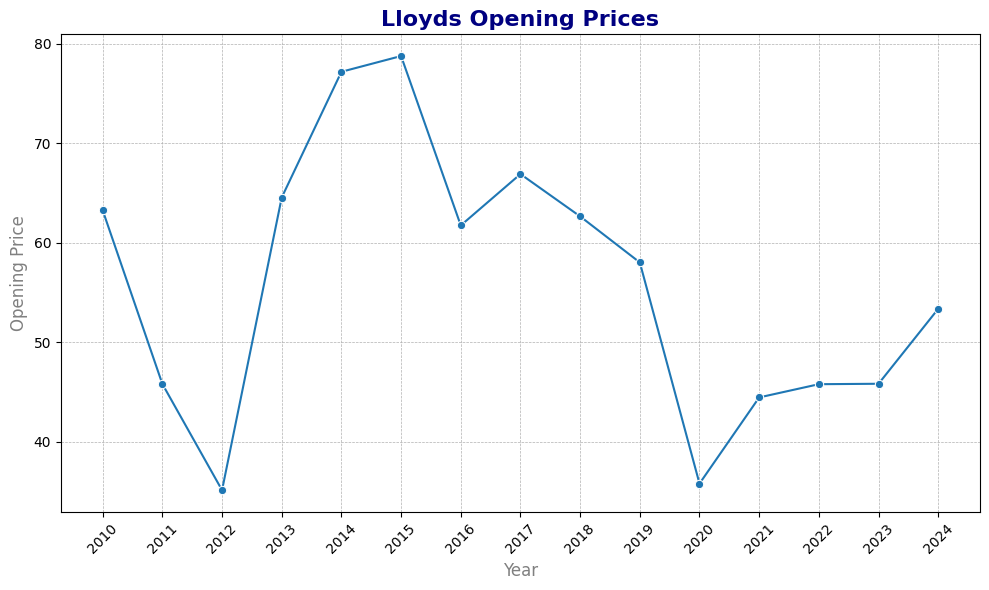

In [6]:
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')
years = data.index.year

# Plot Opening Prices
plt.figure(figsize=(10, 6))
sns.lineplot(x=years, y=data['Open'].values.ravel(),
             color='#1f77b4', marker='o', errorbar=None)
plt.title('Lloyds Opening Prices', fontsize=16, color='navy', weight='bold')
plt.xlabel('Year', fontsize=12, color='gray')
plt.ylabel('Opening Price', fontsize=12, color='gray')

# Set x-ticks to show unique years
plt.xticks(ticks=range(years.min(), years.max() + 1), rotation=45)

plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Closing Price

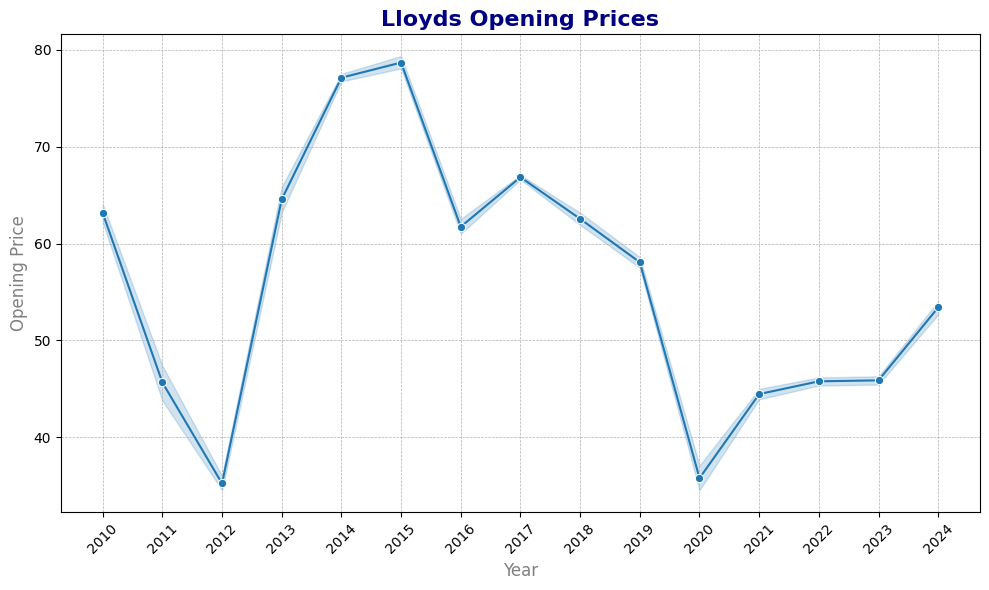

In [7]:
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')
years = data.index.year

# Plot Opening Prices
plt.figure(figsize=(10, 6))
sns.lineplot(x=years, y=data['Close'].values.ravel(), color='#1f77b4', marker='o')
plt.title('Lloyds Opening Prices', fontsize=16, color='navy', weight='bold')
plt.xlabel('Year', fontsize=12, color='gray')
plt.ylabel('Opening Price', fontsize=12, color='gray')

# Set x-ticks to show unique years
plt.xticks(ticks=range(years.min(), years.max() + 1), rotation=45)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

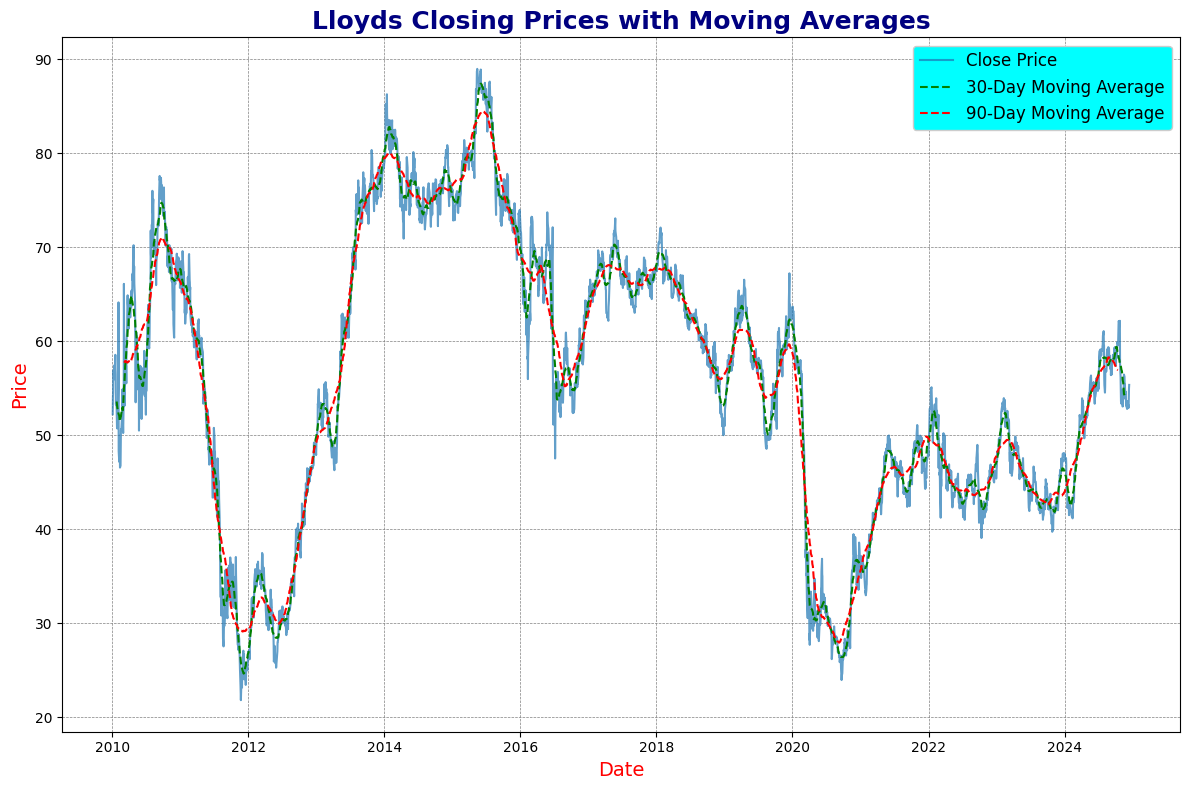

In [8]:
import matplotlib.pyplot as plt

# Ensure the index is in datetime format
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')

# Calculate Moving Averages
data['MA_30'] = data['Close'].rolling(window=30, center=True).mean()  # 30-day moving average
data['MA_90'] = data['Close'].rolling(window=90, center=True).mean()  # 90-day moving average

# Plot Close Prices with Moving Averages
plt.figure(figsize=(12, 8))
# Plot the data
plt.plot(data.index, data['Close'], label='Close Price', color='#1f77b4', alpha=0.7, linewidth=1.5)  # Blue for close price
plt.plot(data.index, data['MA_30'], label='30-Day Moving Average', color='green', linestyle='--', linewidth=1.5)  # Orange for MA_30
plt.plot(data.index, data['MA_90'], label='90-Day Moving Average', color='red', linestyle='--', linewidth=1.5)  # Green for MA_90

# Add labels and title
plt.title('Lloyds Closing Prices with Moving Averages', fontsize=18, color='navy', weight='bold')
plt.xlabel('Date', fontsize=14, color='Red')
plt.ylabel('Price', fontsize=14, color='Red')

# Add a legend with a colored box
legend = plt.legend(frameon=True, loc='upper right', fontsize=12)
frame = legend.get_frame()
frame.set_facecolor('cyan')
frame.set_alpha(1)
# Add grid
plt.grid(visible=True, linestyle='--', linewidth=0.5, color='gray')

# Adjust layout and show plot
plt.tight_layout()
plt.show()



In [9]:
data.drop(columns=["MA_30", "MA_90"], inplace=True)

data.head(10)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L
Date,,,,,,
2010-01-04,36.779495,52.259998,52.259998,51.099998,51.400002,167623403
2010-01-05,38.025188,54.029999,54.759998,52.200001,52.500000,233026957
2010-01-06,38.419300,54.590000,55.230000,53.169998,55.000000,142079248
2010-01-07,40.066151,56.930000,57.070000,54.000000,54.860001,216171360
2010-01-08,40.045033,56.900002,57.520000,56.160000,56.990002,178033888
2010-01-11,39.503128,56.130001,57.950001,55.630001,57.799999,169834032
2010-01-12,39.390518,55.970001,56.290001,55.080002,55.590000,189050155
2010-01-13,39.411636,56.000000,56.200001,55.160000,55.639999,117598072


# LSTM Model

In [16]:
# Scale the Close Prices
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Prepare data for LSTM
def create_lstm_dataset(dataset, time_step):
    X, y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:i + time_step])
        y.append(dataset[i + time_step])
    return np.array(X), np.array(y)

# Define time step for sequence
time_step = 1260
X, y = create_lstm_dataset(scaled_data, time_step)

# Split data into train and test sets
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Build the LSTM model
model = Sequential([
    Bidirectional(LSTM(100, return_sequences=True, input_shape=(time_step, 1))),
    Dropout(0.3),
    BatchNormalization(),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu', kernel_regularizer='l2'),
    Dense(1)
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae']) # Add 'mae' as a metric

# Train the model and record history
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    verbose=1
)



Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 137ms/step - loss: 0.3280 - mae: 0.1367 - val_loss: 0.2915 - val_mae: 0.2875
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - loss: 0.1839 - mae: 0.0575 - val_loss: 0.1679 - val_mae: 0.2099
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - loss: 0.1059 - mae: 0.0468 - val_loss: 0.0919 - val_mae: 0.1434
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 129ms/step - loss: 0.0602 - mae: 0.0455 - val_loss: 0.0494 - val_mae: 0.0934
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - loss: 0.0340 - mae: 0.0428 - val_loss: 0.0266 - val_mae: 0.0668
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - loss: 0.0197 - mae: 0.0417 - val_loss: 0.0151 - val_mae: 0.0529
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - loss: 0.0117 - mae: 0.0363 - val_loss: 0.0092 - val_mae: 0.0446
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - loss: 0.0074 - mae: 0.0327 - val_loss: 0.0053 - val_mae: 0.0334
Epoch 9/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 127ms/step - loss:

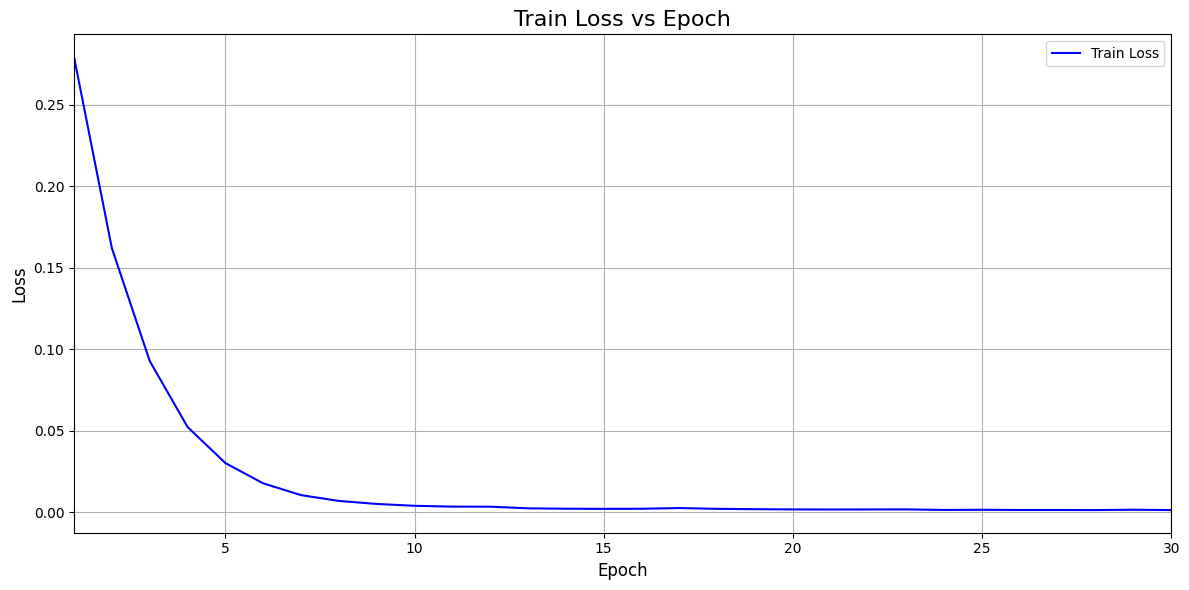

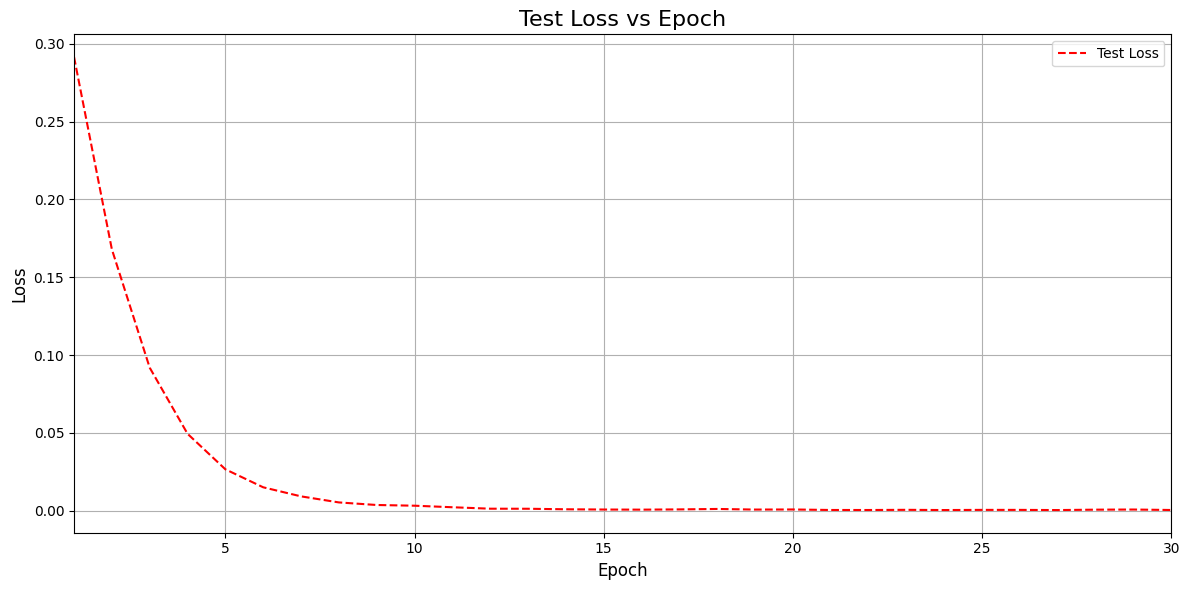

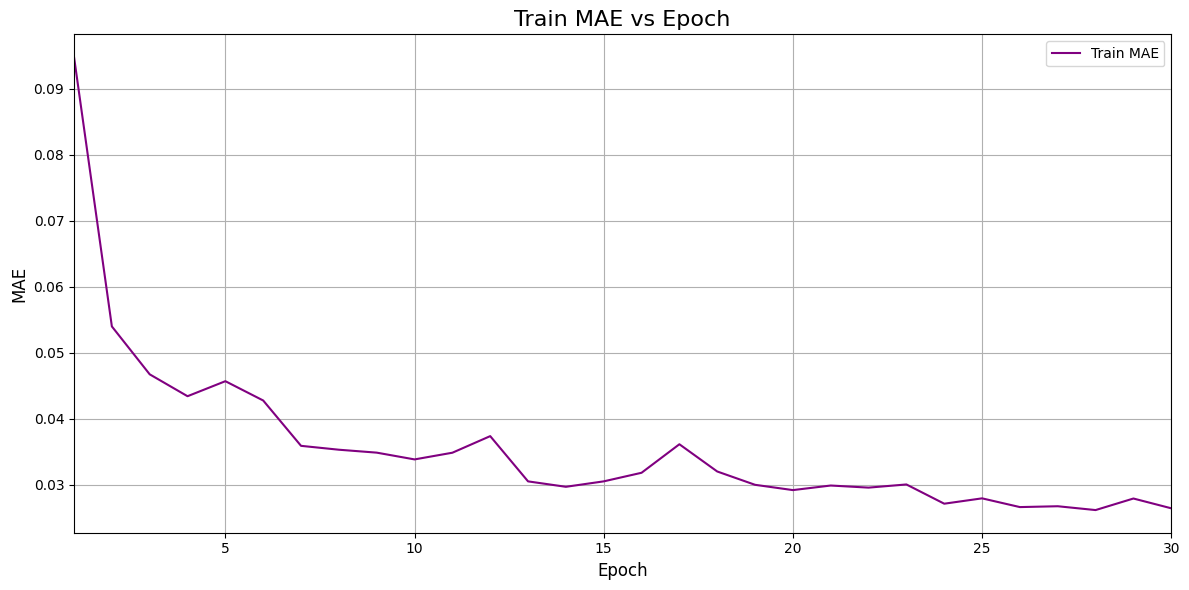

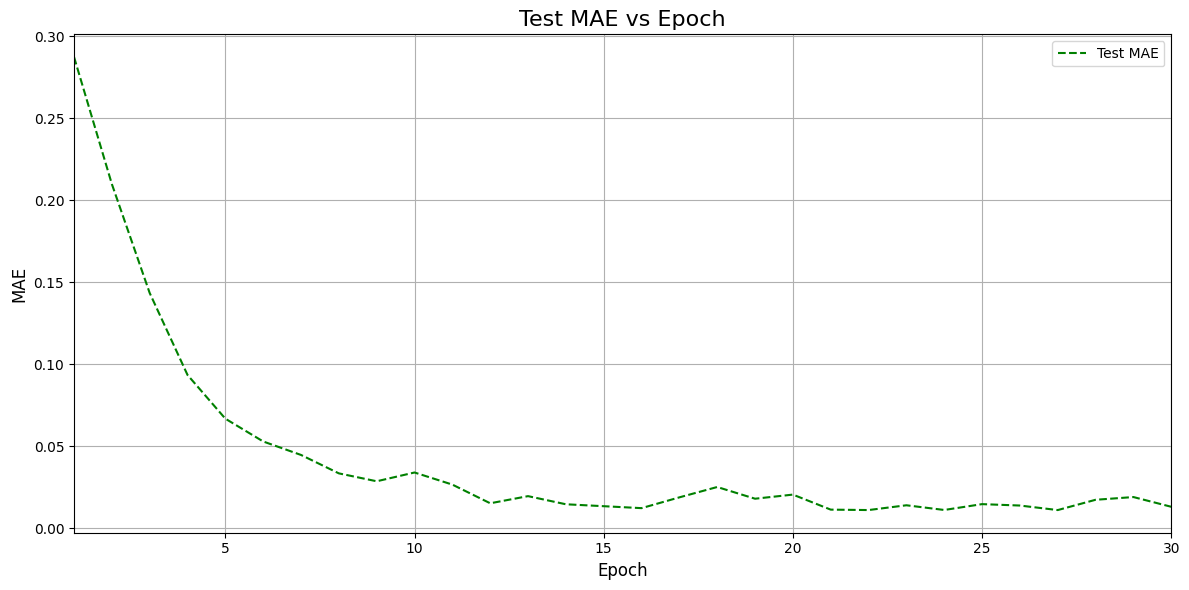

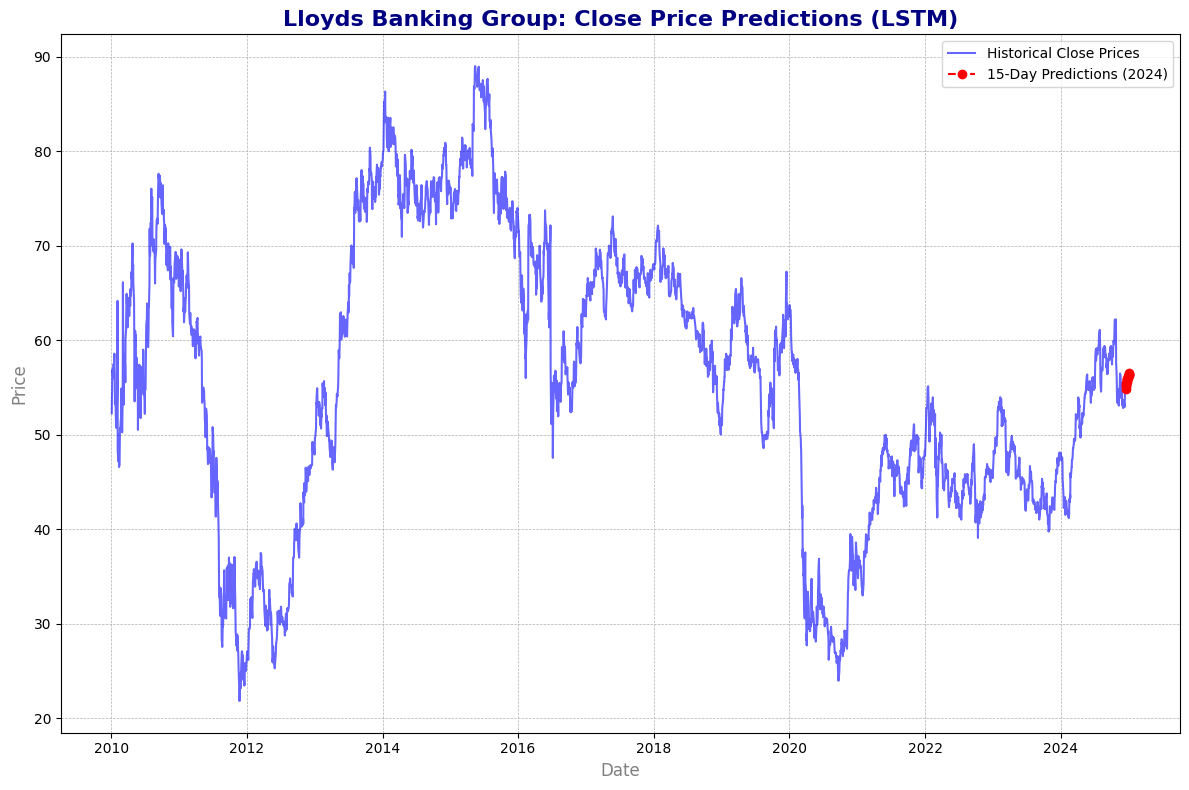

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
Test Evaluation Metrics:
Mean Squared Error (MSE): 1.2989
Root Mean Squared Error (RMSE): 1.1397
Mean Absolute Error (MAE): 0.8747
R-squared (R²): 0.9620
Mean Absolute Percentage Error (MAPE): 1.81%


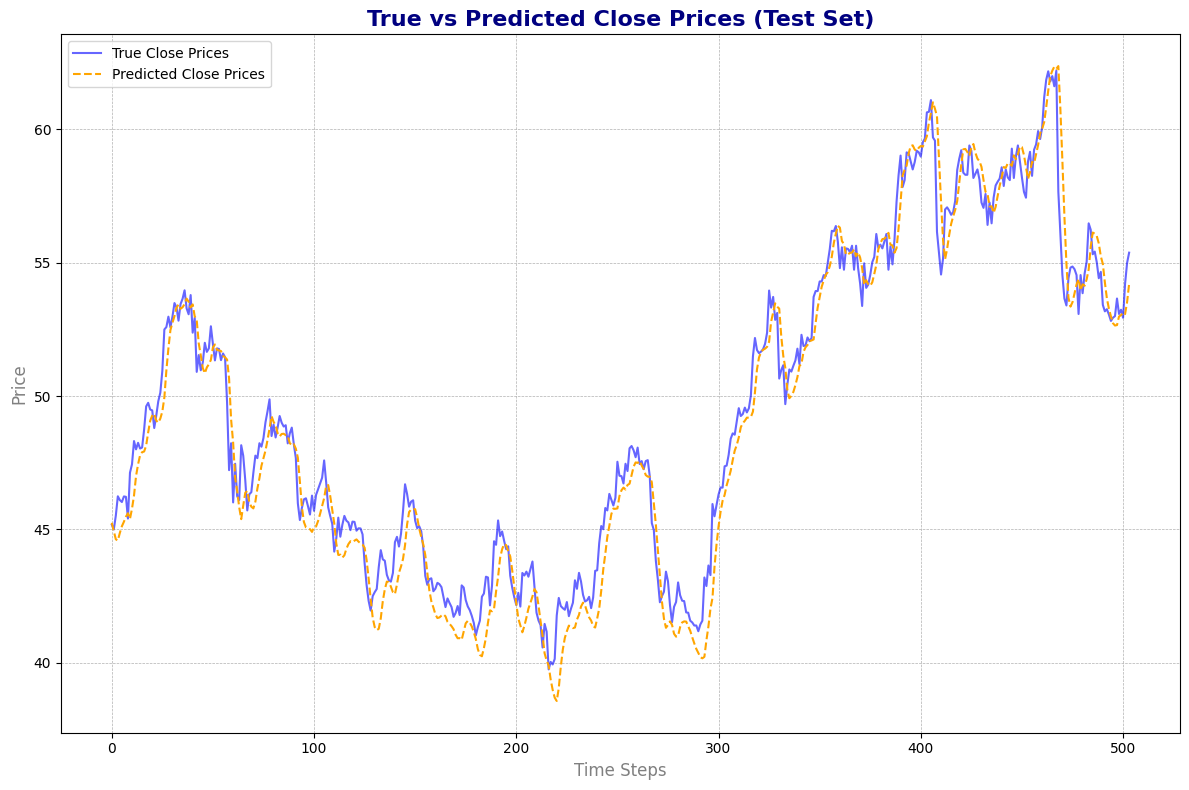

In [17]:
# Save training loss graph
plt.figure(figsize=(12, 6))
plt.plot(range(1, 31), history.history['loss'], label='Train Loss', color='blue')
plt.title('Train Loss vs Epoch', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid()
plt.xlim(1, 30)
plt.tight_layout()
plt.savefig('train_loss_vs_epoch.png')
plt.show()

# Save testing loss graph
plt.figure(figsize=(12, 6))
plt.plot(range(1, 31), history.history['val_loss'], label='Test Loss', color='red', linestyle='--')
plt.title('Test Loss vs Epoch', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid()
plt.xlim(1, 30)
plt.tight_layout()
plt.savefig('test_loss_vs_epoch.png')
plt.show()

# Save training accuracy graph
plt.figure(figsize=(12, 6))
plt.plot(range(1, 31), history.history['mae'], label='Train MAE', color='purple') # Change 'accuracy' to 'mae'
plt.title('Train MAE vs Epoch', fontsize=16) # Change title to reflect MAE
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MAE', fontsize=12) # Change y-axis label to MAE
plt.legend()
plt.grid()
plt.xlim(1, 30)
plt.tight_layout()
plt.savefig('train_mae_vs_epoch.png') # Change filename to reflect MAE
plt.show()

# Save testing accuracy graph
plt.figure(figsize=(12, 6))
plt.plot(range(1, 31), history.history['val_mae'], label='Test MAE', color='green', linestyle='--') # Change 'val_accuracy' to 'val_mae'
plt.title('Test MAE vs Epoch', fontsize=16) # Change title to reflect MAE
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MAE', fontsize=12) # Change y-axis label to MAE
plt.legend()
plt.grid()
plt.xlim(1, 30)
plt.tight_layout()
plt.savefig('test_mae_vs_epoch.png') # Change filename to reflect MAE
plt.show()

# Predict future values for the next 15 business days using 15 steps ahead method
last_sequence = scaled_data[-time_step:]  # Use the last sequence of the training data
future_predictions = []

for _ in range(15):  # Predict for 15 business days
    prediction = model.predict(last_sequence.reshape(1, time_step, 1), verbose=0)  # Predict the next value
    future_predictions.append(prediction[0, 0])  # Save the prediction
    last_sequence = np.append(last_sequence[1:], prediction, axis=0)  # Update the sequence with the new prediction

# Inverse scale the predictions back to the original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Generate future dates starting from the last available date in the dataset
future_dates = pd.date_range(start=data.index[-1], periods=16, freq='B')[1:]  # Generate business days

# Create a DataFrame for future predictions
future_df = pd.DataFrame({'Date': future_dates, 'Predicted Close': future_predictions.ravel()})

# Plot the predictions along with historical data
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['Close'], label='Historical Close Prices', color='blue', alpha=0.6)
plt.plot(future_df['Date'], future_df['Predicted Close'], label='15-Day Predictions (2024)', color='red', linestyle='--', marker='o')
plt.title('Lloyds Banking Group: Close Price Predictions (LSTM)', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('future_predictions.png')
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and true values
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_original, y_pred_original)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)
mape = np.mean(np.abs((y_test_original - y_pred_original) / y_test_original)) * 100

# Print the evaluation metrics
print("Test Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Plot true vs predicted prices for the test set
plt.figure(figsize=(12, 8))
plt.plot(y_test_original, label='True Close Prices', color='blue', alpha=0.6)
plt.plot(y_pred_original, label='Predicted Close Prices', color='orange', linestyle='--')
plt.title('True vs Predicted Close Prices (Test Set)', fontsize=16, color='navy', weight='bold')
plt.xlabel('Time Steps', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('true_vs_predicted.png')
plt.show()


In [11]:
import matplotlib.pyplot as plt
from keras.callbacks import Callback

# Scale the Close Prices
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Prepare data for 15 steps ahead forecasting
def create_lstm_dataset(dataset, time_step=1260, steps_ahead=15):
    X, y = [], []
    for i in range(len(dataset) - time_step - steps_ahead + 1):
        X.append(dataset[i:i + time_step])
        y.append(dataset[i + time_step:i + time_step + steps_ahead])
    return np.array(X), np.array(y)

# Define time step for sequence and forecast horizon
time_step = 1260  # Using past 1260 days (e.g., 5 years of trading data)
steps_ahead = 15  # Predicting 15 steps ahead
X, y = create_lstm_dataset(scaled_data, time_step, steps_ahead)

# Split data into train and test sets
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Custom Callback to Record Testing Accuracy
class TestingAccuracyCallback(Callback):
    def __init__(self, test_data):
        self.test_data = test_data
        self.testing_accuracies = []

    def on_epoch_end(self, epoch, logs=None):
        X_test, y_test = self.test_data
        test_loss = self.model.evaluate(X_test, y_test, verbose=0)
        self.testing_accuracies.append(test_loss)

# Build the LSTM model
model = Sequential([
    Bidirectional(LSTM(100, return_sequences=True, input_shape=(time_step, 1))),
    Dropout(0.3),
    BatchNormalization(),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(50, activation='relu', kernel_regularizer='l2'),
    Dense(steps_ahead)  # Output 15 future steps
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Initialize testing accuracy callback
test_accuracy_callback = TestingAccuracyCallback(test_data=(X_test, y_test))

# Train the model and log history
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    verbose=1,
    callbacks=[test_accuracy_callback]
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 155ms/step - loss: 0.5606 - mae: 0.2375 - val_loss: 0.3292 - val_mae: 0.2339
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 140ms/step - loss: 0.2346 - mae: 0.0761 - val_loss: 0.1490 - val_mae: 0.1428
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - loss: 0.1081 - mae: 0.0651 - val_loss: 0.0650 - val_mae: 0.0896
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 149ms/step - loss: 0.0484 - mae: 0.0592 - val_loss: 0.0273 - val_mae: 0.0639
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - loss: 0.0222 - mae: 0.0529 - val_loss: 0.0134 - val_mae: 0.0589
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - loss: 0.0116 - mae: 0.0510 - val_loss: 0.0088 - val_mae: 0.0600
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - loss: 0.0072 - mae: 0.0478 - val_loss: 0.0067 - val_mae: 0.0580
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - loss: 0.0058 - mae: 0.0480 - val_loss: 0.0096 - val_mae: 0.0795
Epoch 9/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step 

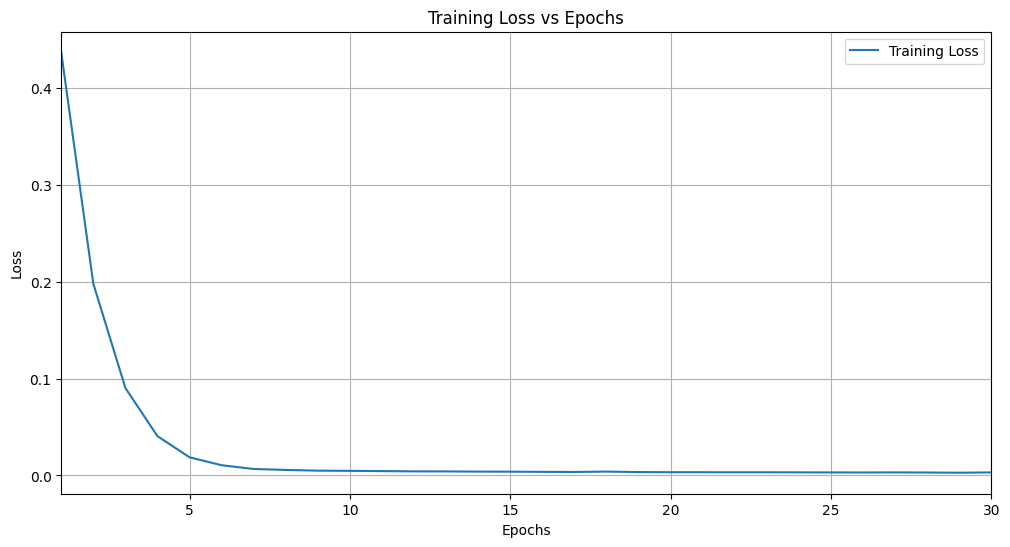

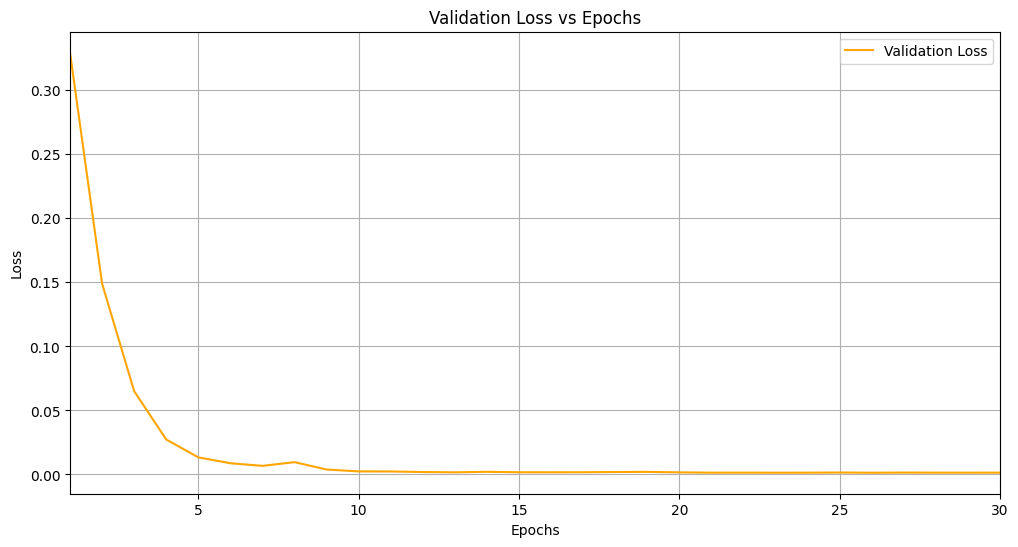

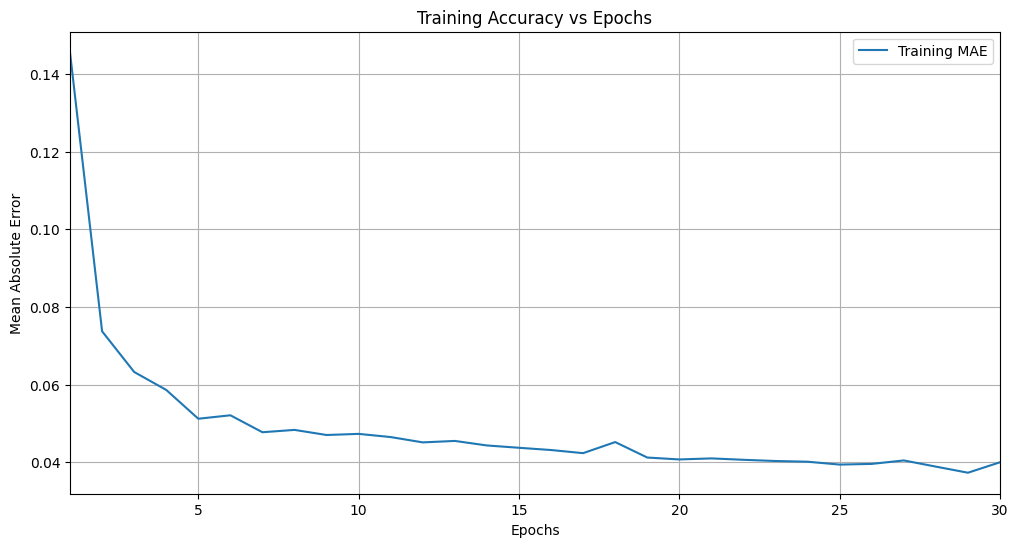

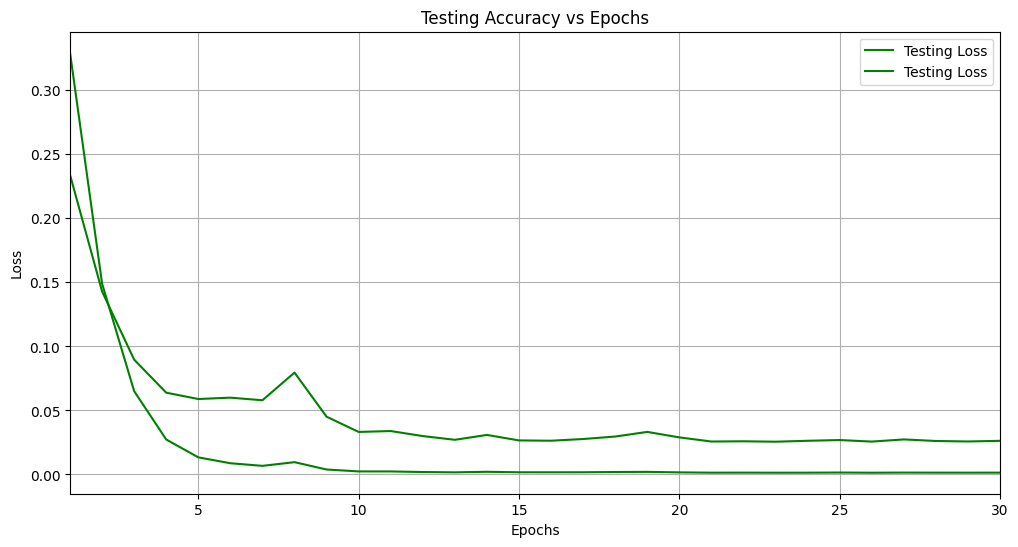

In [13]:
# Extract metrics for plotting
epochs = range(1, 31)
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['mae']
validation_accuracy = history.history['val_mae']
testing_accuracy = test_accuracy_callback.testing_accuracies

# Plot Training Loss vs Epochs
plt.figure(figsize=(12, 6))
plt.plot(epochs, training_loss, label='Training Loss')
plt.xlim(1, 30)
plt.title('Training Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Testing Loss vs Epochs
plt.figure(figsize=(12, 6))
plt.plot(epochs, validation_loss, label='Validation Loss', color='orange')
plt.xlim(1, 30)
plt.title('Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training Accuracy vs Epochs
plt.figure(figsize=(12, 6))
plt.plot(epochs, training_accuracy, label='Training MAE')
plt.xlim(1, 30)
plt.title('Training Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

# Plot Testing Accuracy vs Epochs
plt.figure(figsize=(12, 6))
plt.plot(epochs, testing_accuracy, label='Testing Loss', color='green')
plt.xlim(1, 30)
plt.title('Testing Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Scale the Close Prices
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Prepare data for LSTM
def create_lstm_dataset(dataset, time_step=15):
    X, y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:i + time_step])
        y.append(dataset[i + time_step])
    return np.array(X), np.array(y)

# Define time step for sequence
time_step = 1260
X, y = create_lstm_dataset(scaled_data, time_step)

# Split data into train and test sets
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Build the LSTM model
model = Sequential([
    Bidirectional(LSTM(100, return_sequences=True, input_shape=(time_step, 1))),
    Dropout(0.3),
    BatchNormalization(),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu', kernel_regularizer='l2'),
    Dense(1)
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

model.build(input_shape=(None, time_step, 1))

# Visualize the model architecture
plot_model(model, show_shapes=True, show_layer_names=True, to_file='lstm_architecture.png')

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - loss: 0.3622
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - loss: 0.1974
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - loss: 0.1153
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - loss: 0.0664
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - loss: 0.0382
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - loss: 0.0223
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - loss: 0.0141
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - loss: 0.0092
Epoch 9/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - loss: 0.0066
Epoch 10/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - loss: 0.0051
Epoch 11/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - loss: 0.0044
Epoch 12/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - loss: 0.0040
Epoch 13/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - loss: 0.0033
Epoch 14/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - loss: 0.0029
Epoch 15/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/s

In [25]:
# Predict future values for the next 15 business days using the most recent sequence
last_sequence = scaled_data[-time_step:]  # Use the last sequence of the training data
future_predictions = []

for _ in range(15):  # Predict for 15 business days
    prediction = model.predict(last_sequence.reshape(1, time_step, 1), verbose=0)  # Predict the next value
    future_predictions.append(prediction[0, 0])  # Save the prediction
    last_sequence = np.append(last_sequence[1:], prediction, axis=0)  # Update the sequence with the new prediction

# Inverse scale the predictions back to the original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Generate future dates starting from the last available date in the dataset
future_dates = pd.date_range(start=data.index[-1], periods=16, freq='B')[1:]  # Generate business days

# Create a DataFrame for future predictions
future_df = pd.DataFrame({'Date': future_dates, 'Predicted Close': future_predictions.ravel()})

# Plot the predictions along with historical data
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['Close'], label='Historical Close Prices', color='blue', alpha=0.6)
plt.plot(future_df['Date'], future_df['Predicted Close'], label='15-Day Predictions (2024)', color='red', linestyle='--', marker='o')
plt.title('Lloyds Banking Group: Close Price Predictions (LSTM)', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Display the LSTM model architecture image
img = mpimg.imread('lstm_architecture.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

# Print predicted values for future dates
print("Future Predictions:")
print(future_df)


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 1 has size 15

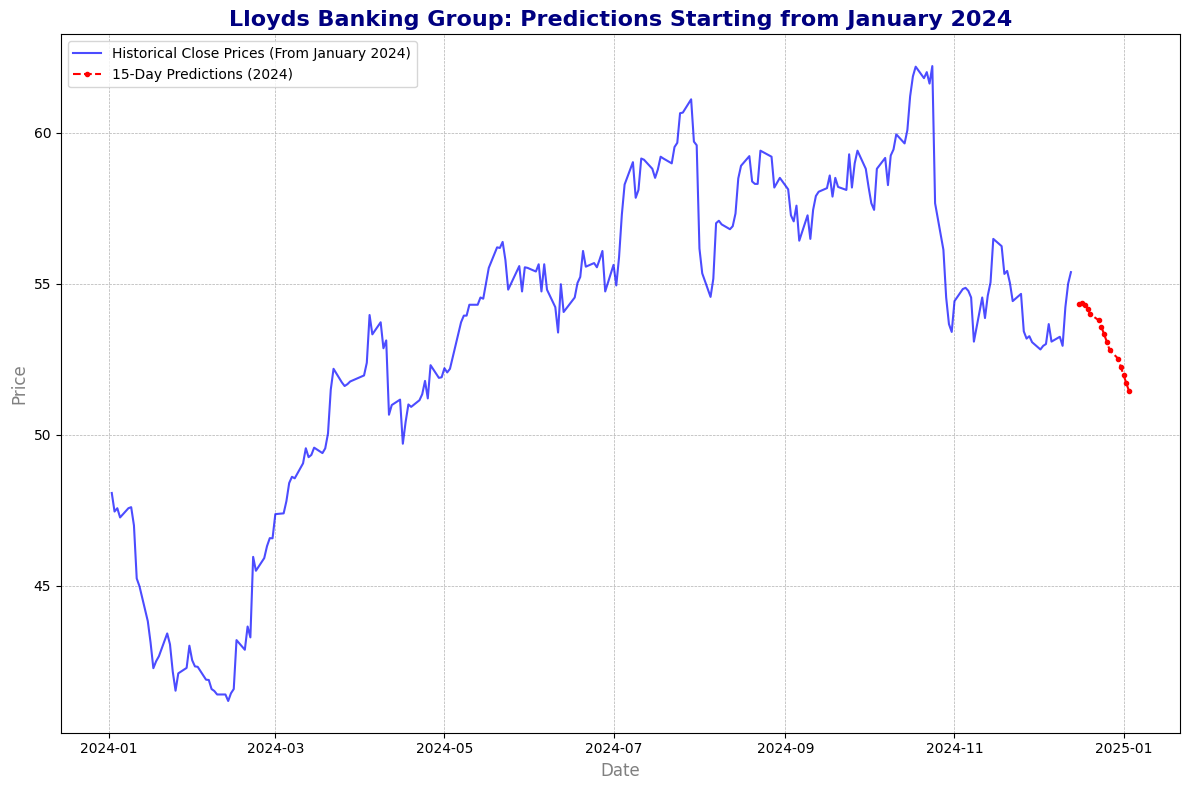

In [21]:
# Convert the index to datetime format (if not already done)
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')

# Filter data starting from January 1, 2024
filtered_data = data[data.index >= '2024-01-01']

# Plot the subset data with predictions
plt.figure(figsize=(12, 8))
plt.plot(filtered_data.index, filtered_data['Close'], label='Historical Close Prices (From January 2024)', color='blue', alpha=0.7)
plt.plot(future_df['Date'], future_df['Predicted Close'], label='15-Day Predictions (2024)', color='red', linestyle='--', marker='.')
plt.title('Lloyds Banking Group: Predictions Starting from January 2024', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
Test Evaluation Metrics:
Mean Squared Error (MSE): 1.0108
Root Mean Squared Error (RMSE): 1.0054
Mean Absolute Error (MAE): 0.7866
R-squared (R²): 0.9704


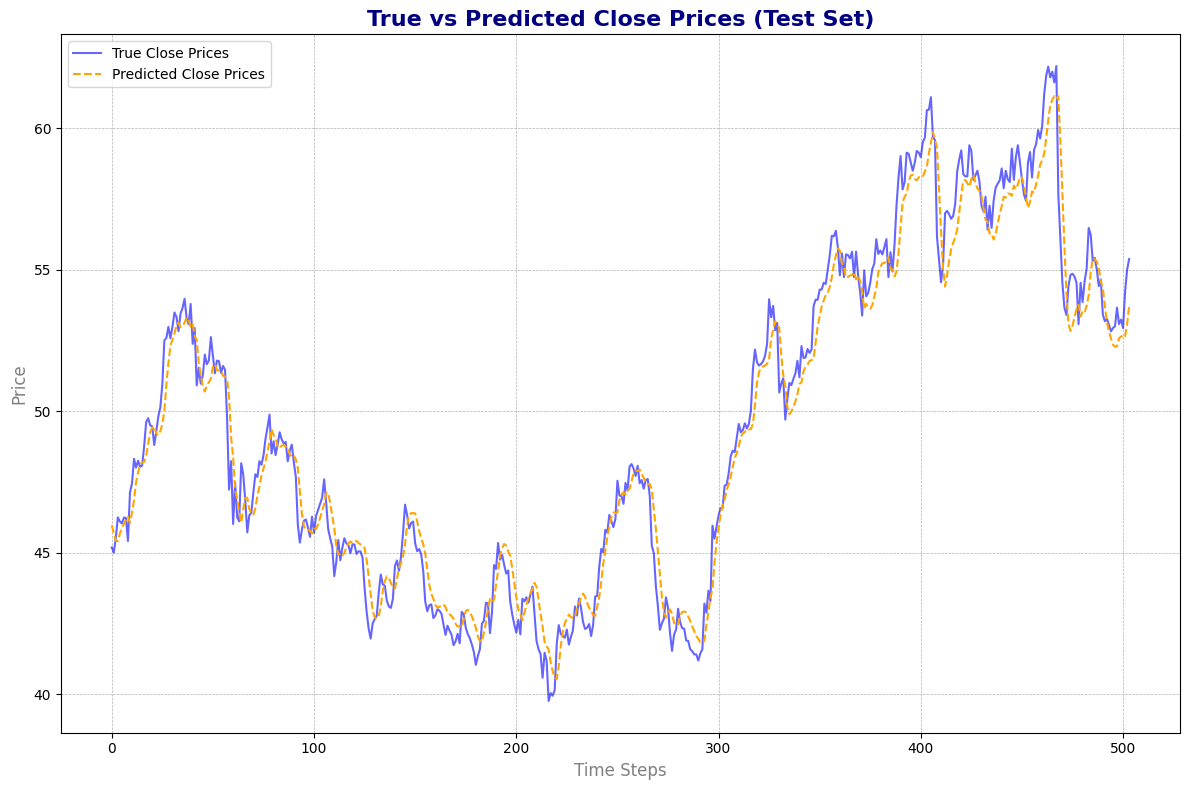

In [22]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and true values
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_original, y_pred_original)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)

# Print the evaluation metrics
print("Test Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Plot true vs predicted prices for the test set
plt.figure(figsize=(12, 8))
plt.plot(y_test_original, label='True Close Prices', color='blue', alpha=0.6)
plt.plot(y_pred_original, label='Predicted Close Prices', color='orange', linestyle='--')
plt.title('True vs Predicted Close Prices (Test Set)', fontsize=16, color='navy', weight='bold')
plt.xlabel('Time Steps', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


#ARIMA Model

In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.5 MB/s eta 0:00:00


Searching for best ARIMA/SARIMA parameters...
ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC: 41348.25521240102


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC: 36344.61488179397


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC: 20218.131613666108


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC: 20144.647070393206


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC: 20221.83366445968


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC: 20217.29690434347


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC: 20154.240308563956


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC: 20146.363588094868


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC: 36208.58242726315


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC: 31350.248788944762


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC: 17080.711751879655


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC: 16897.071291595166


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC: 17088.399731304813


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di

ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC: 20297.23944168097
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC: 16888.695529406767


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC: 16864.498058287874


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 2)x(0, 0, 0, 12) - AIC: 31645.887105896094


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 2)x(0, 0, 1, 12) - AIC: 27376.205784109872


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 2)x(0, 1, 0, 12) - AIC: 15783.74750506708


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 2)x(0, 1, 1, 12) - AIC: 15374.458617197819


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di

ARIMA(0, 0, 2)x(1, 0, 0, 12) - AIC: 17184.92100103289


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 2)x(1, 0, 1, 12) - AIC: 15897.081213366528
ARIMA(0, 0, 2)x(1, 1, 0, 12) - AIC: 15395.859328374165


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 2)x(1, 1, 1, 12) - AIC: 15378.544819533134
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC: 11744.275424779426


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC: 11700.736372847492


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC: 14257.005354216122


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC: 11599.149246821102
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC: 11710.87054774613


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC: 11602.862254163996


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC: 12965.100184133233


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC: 11601.14971380676
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC: 11740.009182252026


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC: 11696.94430220461


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC: 14254.788066042136


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC: 11603.991566784985


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC: 11709.062196475094


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC: 11604.688071064855


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC: 12967.058302094501


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC: 11605.991966955606


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC: 11719.001064355925


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC: 11678.862461022083


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 2)x(0, 1, 0, 12) - AIC: 14234.413056803003


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 2)x(0, 1, 1, 12) - AIC: 11581.60156457642


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC: 11693.833336018251


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC: 11587.463309715355


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 2)x(1, 1, 0, 12) - AIC: 12953.902914818067


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 2)x(1, 1, 1, 12) - AIC: 11583.602002330626


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC: 11750.44085870213


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC: 11712.230633471368


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC: 14072.114354530851


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(0, 1, 1, 12) - AIC: 11598.0605268902


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC: 11712.465211646719


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC: 11617.065439748367


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC: 12852.056141189854


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 1, 1, 12) - AIC: 11600.061281216958


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC: 11744.052439565383


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC: 11700.795663709538


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC: 14058.269126650492


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC: 11603.131332689492


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC: 11710.682422898612


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC: 11608.93877196914


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC: 12850.912541649937


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC: 11605.13196522219


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 2)x(0, 0, 0, 12) - AIC: 11726.99126340052


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 2)x(0, 0, 1, 12) - AIC: 11683.042674846793


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 2)x(0, 1, 0, 12) - AIC: 14057.100793310748


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 2)x(0, 1, 1, 12) - AIC: 11582.045323704237


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 2)x(1, 0, 0, 12) - AIC: 11695.506010586545


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 2)x(1, 0, 1, 12) - AIC: 11594.706797774441


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 2)x(1, 1, 0, 12) - AIC: 12849.195427001185


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 2)x(1, 1, 1, 12) - AIC: 11584.045842690015
ARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC: 11742.916989249441


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC: 11699.469899581527
ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC: 14257.797605286421


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC: 11601.145774601475


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC: 11699.541247240586


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC: 11607.51614774155


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC: 12964.523816644722


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC: 11603.037857290907


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC: 11728.930235261381


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC: 11686.12260304248


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC: 14072.592168041534


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC: 11594.58277333494


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC: 11690.0136695923


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC: 11595.47277180462


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC: 12859.853117246259


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC: 11596.58311666999


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC: 11720.909004718054


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC: 11680.785208542053


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 2)x(0, 1, 0, 12) - AIC: 14066.289212371095


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 2)x(0, 1, 1, 12) - AIC: 11583.598093334094


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC: 11685.641010642252


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC: 11589.0147091174


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 2)x(1, 1, 0, 12) - AIC: 12949.729965349226


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 2)x(1, 1, 1, 12) - AIC: 11585.59865214942


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 0)x(0, 0, 0, 12) - AIC: 11744.584336900258


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 0)x(0, 0, 1, 12) - AIC: 11711.073408875745


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 0)x(0, 1, 0, 12) - AIC: 14058.377726984072


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 0)x(0, 1, 1, 12) - AIC: 11600.057227115827


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di

ARIMA(2, 0, 0)x(1, 0, 0, 12) - AIC: 11701.209838104403
ARIMA(2, 0, 0)x(1, 0, 1, 12) - AIC: 11609.30078621702


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 0)x(1, 1, 0, 12) - AIC: 12848.40272721241


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 0)x(1, 1, 1, 12) - AIC: 11605.182048525472


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 1)x(0, 0, 0, 12) - AIC: 11734.736579091294


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 1)x(0, 0, 1, 12) - AIC: 11693.294039714516


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 1)x(0, 1, 0, 12) - AIC: 13905.219765339198


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 1)x(0, 1, 1, 12) - AIC: 11597.19102711254


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 1)x(1, 0, 0, 12) - AIC: 11693.425028343812


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 1)x(1, 0, 1, 12) - AIC: 11609.395695802079


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 1)x(1, 1, 0, 12) - AIC: 12848.008952253967


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(1, 1, 1, 12) - AIC: 11606.855145357771


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 2)x(0, 0, 0, 12) - AIC: 11728.972343877951


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 2)x(0, 0, 1, 12) - AIC: 11685.053616111256


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 2)x(0, 1, 0, 12) - AIC: 14059.522122433924


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 2)x(0, 1, 1, 12) - AIC: 11584.044733005343


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 2)x(1, 0, 0, 12) - AIC: 11687.259428934876


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 2)x(1, 0, 1, 12) - AIC: 11596.630240579843


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 2)x(1, 1, 0, 12) - AIC: 12848.490044929531


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 2)x(1, 1, 1, 12) - AIC: 11586.524635033531
ARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC: 11726.681204419985


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC: 11684.575044277055
ARIMA(2, 1, 0)x(0, 1, 0, 12) - AIC: 14242.812782439458


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 0)x(0, 1, 1, 12) - AIC: 11588.408137449438


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC: 11682.591359264949


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC: 11594.05378859145


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 0)x(1, 1, 0, 12) - AIC: 12949.464306753727


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 0)x(1, 1, 1, 12) - AIC: 11587.581553942298


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC: 11727.172367030458


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC: 11683.595886235518


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 1)x(0, 1, 0, 12) - AIC: 14069.701502646152


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 1)x(0, 1, 1, 12) - AIC: 11587.56818417554


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC: 11683.752487124595


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC: 11594.880299239607


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 1)x(1, 1, 0, 12) - AIC: 12947.082738744382


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 1)x(1, 1, 1, 12) - AIC: 11589.567140759824


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC: 11721.89302239554


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC: 11681.345917790024


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 2)x(0, 1, 0, 12) - AIC: 14065.01201715072


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 2)x(0, 1, 1, 12) - AIC: 11584.217308287458


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC: 11683.517144633937


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC: 11590.998503044162


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(1, 1, 0, 12) - AIC: 12772.113784610458


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 2)x(1, 1, 1, 12) - AIC: 11586.399098734295

Best ARIMA/SARIMA Model Found:
Order: (0, 1, 2), Seasonal Order: (0, 1, 1, 12) with AIC: 11581.60156457642


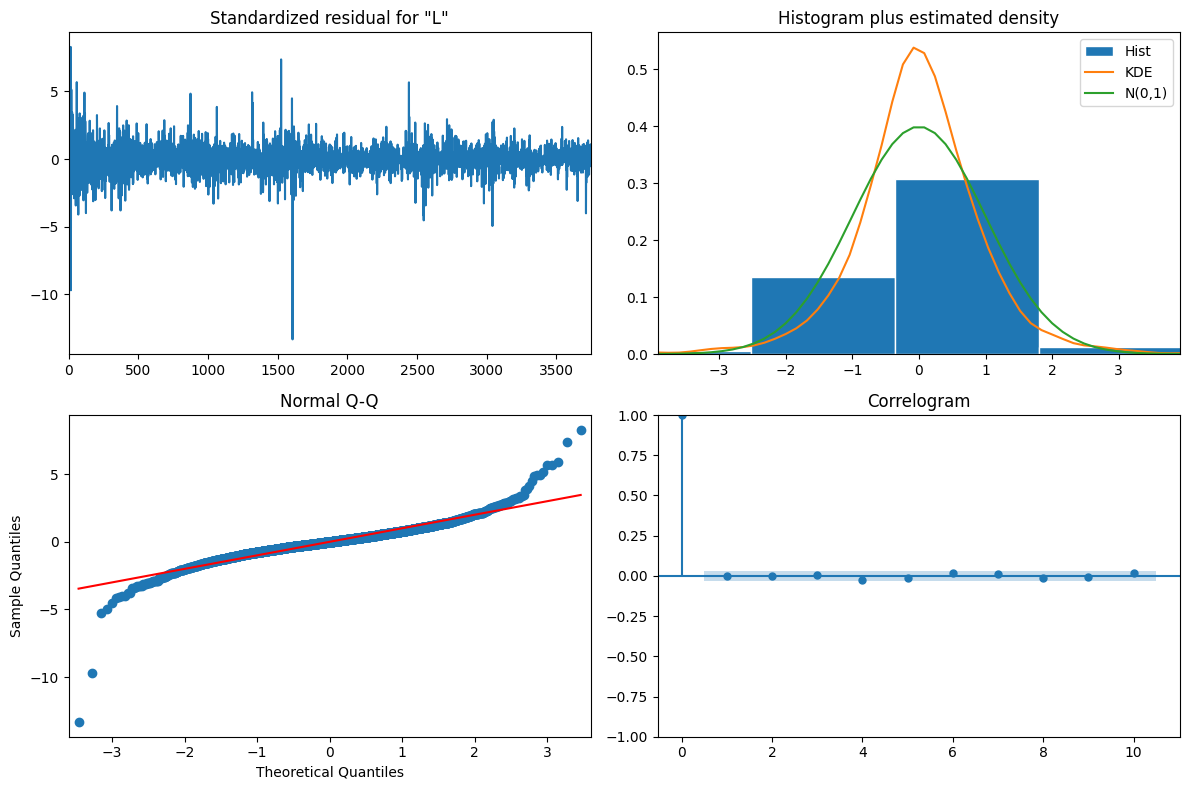

In [ ]:
# Making a datacopy which can be used to bulid a model

data1 =data.copy()

# Extract the 'Close' prices for time series analysis
close_prices = data1['Close']

p = q = range(0, 3)
d = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in itertools.product(range(0, 2),
                                                                  range(0, 2),
                                                                  range(0, 2))]

min_aic = float('inf')
best_order = None
best_seasonal_order = None
best_model = None

print("Searching for best ARIMA/SARIMA parameters...")
for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            model = SARIMAX(close_prices, order=param,
                            seasonal_order=seasonal_param,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            results = model.fit(disp=False)
            if results.aic < min_aic:
                min_aic = results.aic
                best_order = param
                best_seasonal_order = seasonal_param
                best_model = results
            print(f"ARIMA{param}x{seasonal_param} - AIC: {results.aic}")
        except Exception as e:
            continue

print("\nBest ARIMA/SARIMA Model Found:")
print(f"Order: {best_order}, Seasonal Order: {best_seasonal_order} with AIC: {min_aic}")

# Step 5: Residual Diagnostics
best_model.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


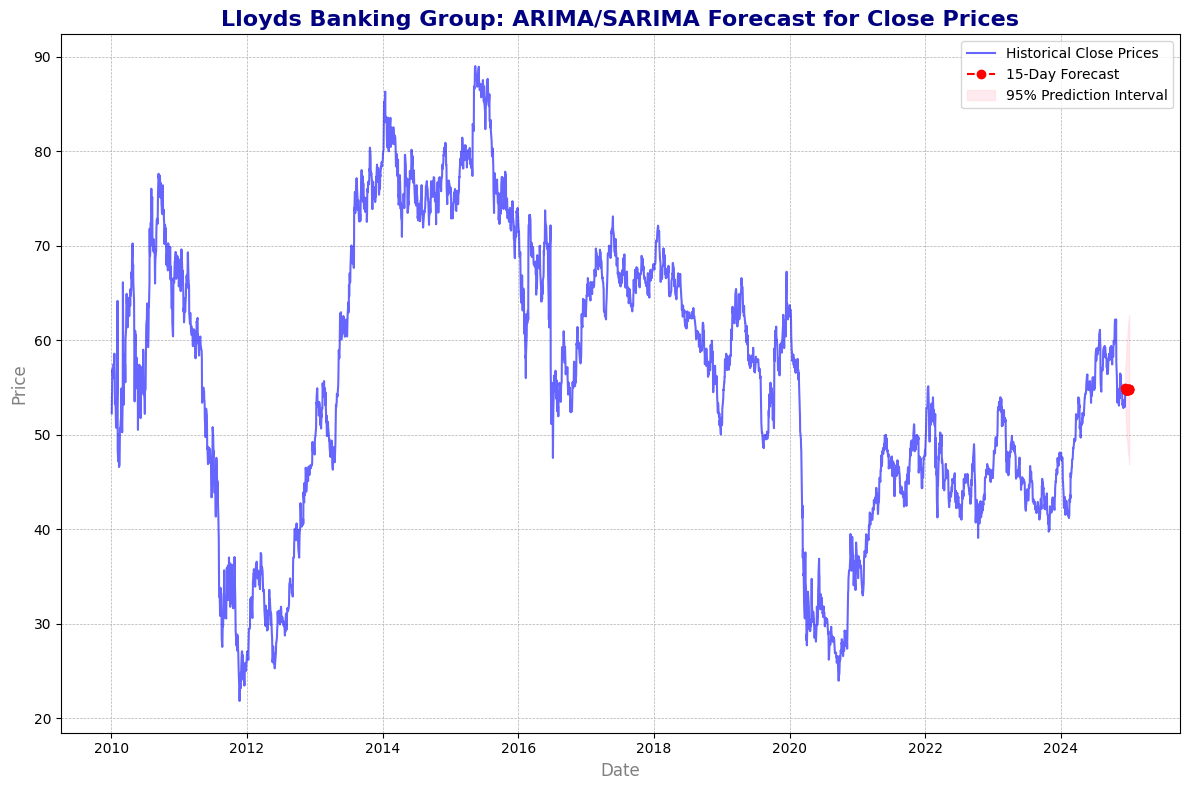

Forecasted Close Prices for the Next 15 Days of 2024:
           Date  Forecasted Close  Lower Bound  Upper Bound
3775 2024-12-13         54.917414    52.708336    57.126493
3776 2024-12-16         54.781205    51.673094    57.889316
3777 2024-12-17         54.736798    51.032899    58.440698
3778 2024-12-18         54.760517    50.544193    58.976841
3779 2024-12-19         54.722640    50.049750    59.395530
3780 2024-12-20         54.758196    49.669540    59.846852
3781 2024-12-23         54.753239    49.280312    60.226166
3782 2024-12-24         54.775684    48.943751    60.607618
3783 2024-12-25         54.692852    48.522767    60.862937
3784 2024-12-26         54.764745    48.274101    61.255388
3785 2024-12-27         54.839742    48.043644    61.635840
3786 2024-12-30         54.847150    47.758747    61.935552
3787 2024-12-31         54.867437    47.494611    62.240264
3788 2025-01-01         54.789785    47.143143    62.436426
3789 2025-01-02         54.745378    46.834663

In [ ]:
forecast = best_model.get_forecast(steps=15)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Generate future dates
future_dates = pd.date_range(start=close_prices.index[-1], periods=16, freq='B')[1:]  # 15 business days

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecasted Close': forecast_values,
    'Lower Bound': forecast_conf_int.iloc[:, 0],
    'Upper Bound': forecast_conf_int.iloc[:, 1]
})

# Step 7: Plot the Historical Data and Forecast
plt.figure(figsize=(12, 8))
plt.plot(close_prices.index, close_prices, label='Historical Close Prices', color='blue', alpha=0.6)
plt.plot(forecast_df['Date'], forecast_df['Forecasted Close'], label='15-Day Forecast', color='red', linestyle='--', marker='o')
plt.fill_between(forecast_df['Date'], forecast_df['Lower Bound'], forecast_df['Upper Bound'], color='pink', alpha=0.3, label='95% Prediction Interval')
plt.title('Lloyds Banking Group: ARIMA/SARIMA Forecast for Close Prices', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

print("Forecasted Close Prices for the Next 15 Days of 2024:")
print(forecast_df)

# Step 8: Model Evaluation
y_true = close_prices[-15:]
y_forecasted = best_model.predict(start=len(close_prices) - 15, end=len(close_prices) - 1)

mse = mean_squared_error(y_true, y_forecasted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_forecasted)
r2 = r2_score(y_true, y_forecasted)

print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

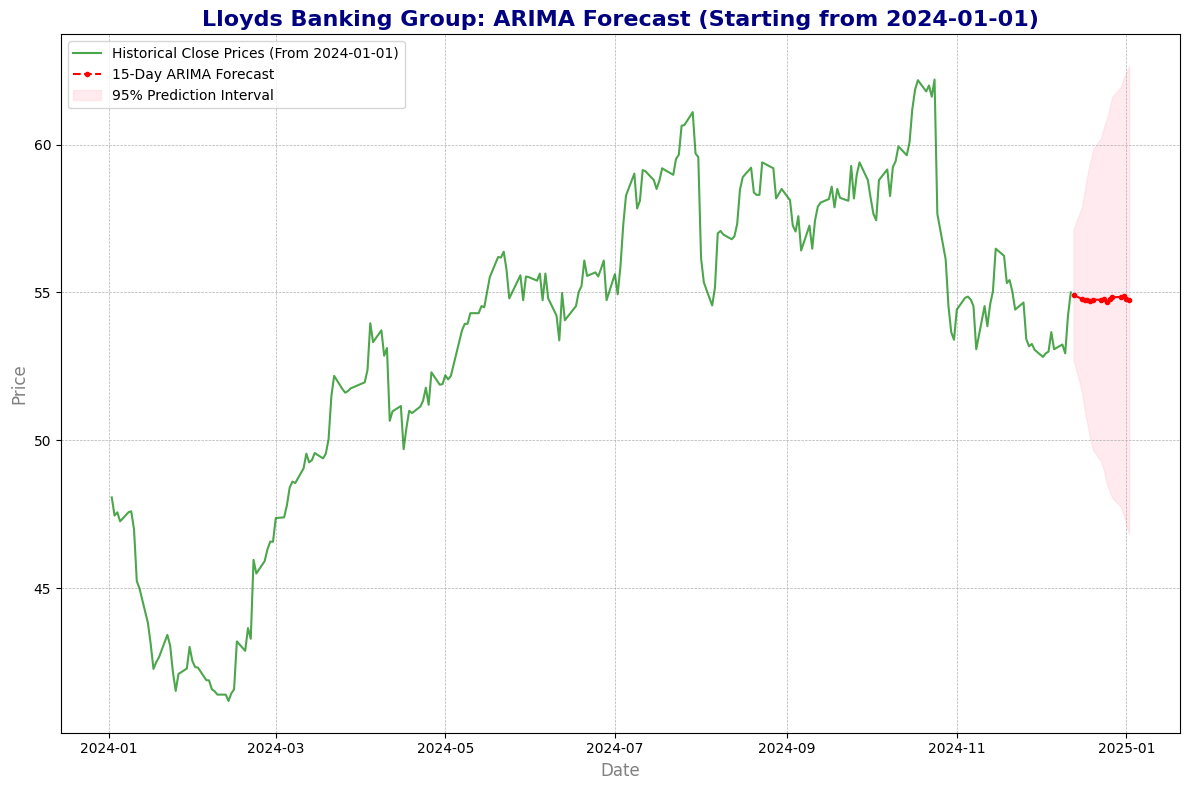

Forecasted Close Prices for the Next 15 Days of 2024:
           Date  Forecasted Close  Lower Bound  Upper Bound
3775 2024-12-13         54.917414    52.708336    57.126493
3776 2024-12-16         54.781205    51.673094    57.889316
3777 2024-12-17         54.736798    51.032899    58.440698
3778 2024-12-18         54.760517    50.544193    58.976841
3779 2024-12-19         54.722640    50.049750    59.395530
3780 2024-12-20         54.758196    49.669540    59.846852
3781 2024-12-23         54.753239    49.280312    60.226166
3782 2024-12-24         54.775684    48.943751    60.607618
3783 2024-12-25         54.692852    48.522767    60.862937
3784 2024-12-26         54.764745    48.274101    61.255388
3785 2024-12-27         54.839742    48.043644    61.635840
3786 2024-12-30         54.847150    47.758747    61.935552
3787 2024-12-31         54.867437    47.494611    62.240264
3788 2025-01-01         54.789785    47.143143    62.436426
3789 2025-01-02         54.745378    46.834663

In [ ]:
# Filter historical data from 2024-01-01 onward
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')  # Ensure the index is datetime
filtered_data = data[data.index >= '2024-01-01']

# Plot data from 2024-01-01 with forecast
plt.figure(figsize=(12, 8))
plt.plot(filtered_data.index, filtered_data['Close'], label='Historical Close Prices (From 2024-01-01)', color='green', alpha=0.7)
plt.plot(forecast_df['Date'], forecast_df['Forecasted Close'], label='15-Day ARIMA Forecast', color='red', linestyle='--', marker='.')
plt.fill_between(forecast_df['Date'], forecast_df['Lower Bound'], forecast_df['Upper Bound'], color='pink', alpha=0.3, label='95% Prediction Interval')
plt.title('Lloyds Banking Group: ARIMA Forecast (Starting from 2024-01-01)', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Display the forecasted values
print("Forecasted Close Prices for the Next 15 Days of 2024:")
print(forecast_df)


# Prophet

In [ ]:
data.head(10)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L
Date,,,,,,
2010-01-04,36.779499,52.259998,52.259998,51.099998,51.400002,167623403
2010-01-05,38.025185,54.029999,54.759998,52.200001,52.500000,233026957
2010-01-06,38.419304,54.590000,55.230000,53.169998,55.000000,142079248
2010-01-07,40.066143,56.930000,57.070000,54.000000,54.860001,216171360
2010-01-08,40.045040,56.900002,57.520000,56.160000,56.990002,178033888
2010-01-11,39.503124,56.130001,57.950001,55.630001,57.799999,169834032
2010-01-12,39.390518,55.970001,56.290001,55.080002,55.590000,189050155
2010-01-13,39.411633,56.000000,56.200001,55.160000,55.639999,117598072


In [ ]:
# If 'Date' is the index, reset it to make it a regular column
if 'Date' not in data.columns:
    data.reset_index(inplace=True)

# Select only 'Date' and 'Close' columns
data_for_prophet = data[['Date', 'Close']].copy()

# Rename the columns for Prophet
data_for_prophet.columns = ['ds', 'y']

# Drop rows with NaN values (if any)
data_for_prophet.dropna(subset=['ds', 'y'], inplace=True)

# Ensure 'y' is numeric
data_for_prophet['y'] = pd.to_numeric(data_for_prophet['y'], errors='coerce')
data_for_prophet.dropna(subset=['y'], inplace=True)  # Drop rows where 'y' is still NaN

# Convert 'ds' column to datetime with the correct format
data_for_prophet['ds'] = pd.to_datetime(data_for_prophet['ds'], format='%d-%m-%Y')

# Display the prepared data
print(data_for_prophet.head(10))

          ds          y
0 2010-01-04  52.259998
1 2010-01-05  54.029999
2 2010-01-06  54.590000
3 2010-01-07  56.930000
4 2010-01-08  56.900002
5 2010-01-11  56.130001
6 2010-01-12  55.970001
7 2010-01-13  56.000000
8 2010-01-14  57.500000
9 2010-01-15  56.779999


In [ ]:
# Define and customize the Prophet model
prophet_model = Prophet(
    growth="linear",                 # Set growth type (linear or logistic)
    seasonality_mode="multiplicative",  # Use multiplicative seasonality for stock price data
    yearly_seasonality=False,
    weekly_seasonality=1,
    daily_seasonality=1,
    changepoint_prior_scale=0.1,     # Adjust flexibility for trend changes
    seasonality_prior_scale=10,      # Control seasonal flexibility
    interval_width=0.95              # 95% prediction interval
)

# Add custom seasonalities
prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
prophet_model.add_seasonality(name='quarterly', period=91.25, fourier_order=8)

# Add holiday effects for the UK
prophet_model.add_country_holidays(country_name='UK')

# Fit the model
prophet_model.fit(data_for_prophet)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpiui84q2p/clkkctff.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiui84q2p/5ekucjr9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9785', 'data', 'file=/tmp/tmpiui84q2p/clkkctff.json', 'init=/tmp/tmpiui84q2p/5ekucjr9.json', 'output', 'file=/tmp/tmpiui84q2p/prophet_modelvadkfuls/prophet_model-20241213142253.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:22:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Forecast for the next 15 business days
future = prophet_model.make_future_dataframe(periods=15, freq='B')  # Business days
forecast = prophet_model.predict(future)

# Extract the forecasted values
forecasted_values = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Filter future predictions (next 15 days)
future_predictions = forecasted_values[forecasted_values['ds'] > data_for_prophet['ds'].max()]
print(future_predictions)

             ds       yhat  yhat_lower  yhat_upper
3775 2024-12-13  52.710031   44.677465   60.638082
3776 2024-12-16  52.746177   45.235215   60.054729
3777 2024-12-17  52.794224   45.168599   60.738833
3778 2024-12-18  52.926241   45.234981   60.943364
3779 2024-12-19  53.044530   45.377737   60.376915
3780 2024-12-20  53.034441   45.284742   60.010222
3781 2024-12-23  52.469519   45.016637   59.665934
3782 2024-12-24  52.447418   44.749028   60.041958
3783 2024-12-25  52.532451   44.884147   60.798040
3784 2024-12-26  52.623962   44.584430   60.063957
3785 2024-12-27  52.649510   44.394152   60.813422
3786 2024-12-30  52.581092   45.064936   60.449027
3787 2024-12-31  52.575445   44.928906   60.264876
3788 2025-01-01  52.508043   44.420928   60.190419
3789 2025-01-02  52.370980   44.516801   59.748591


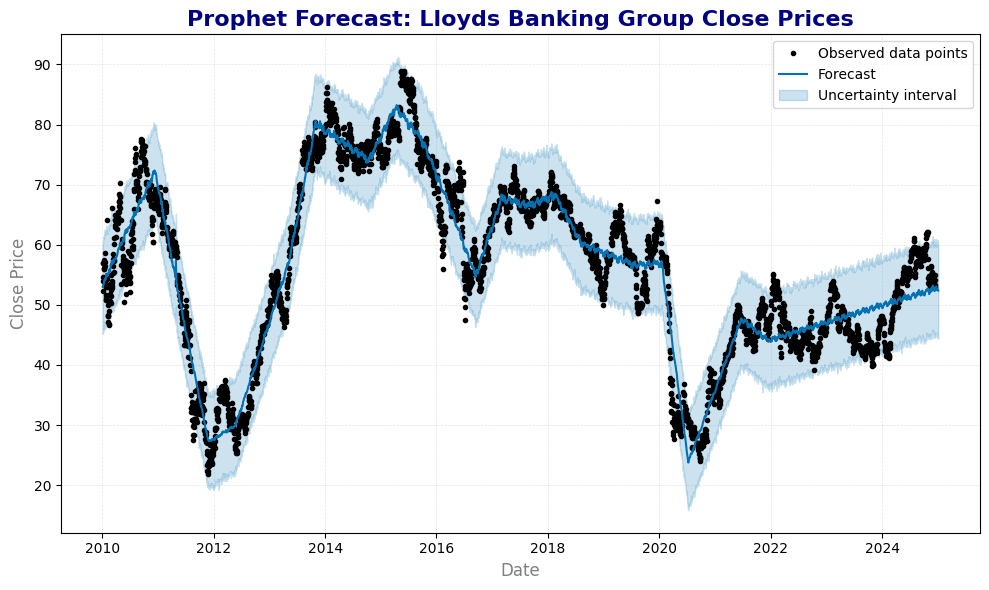

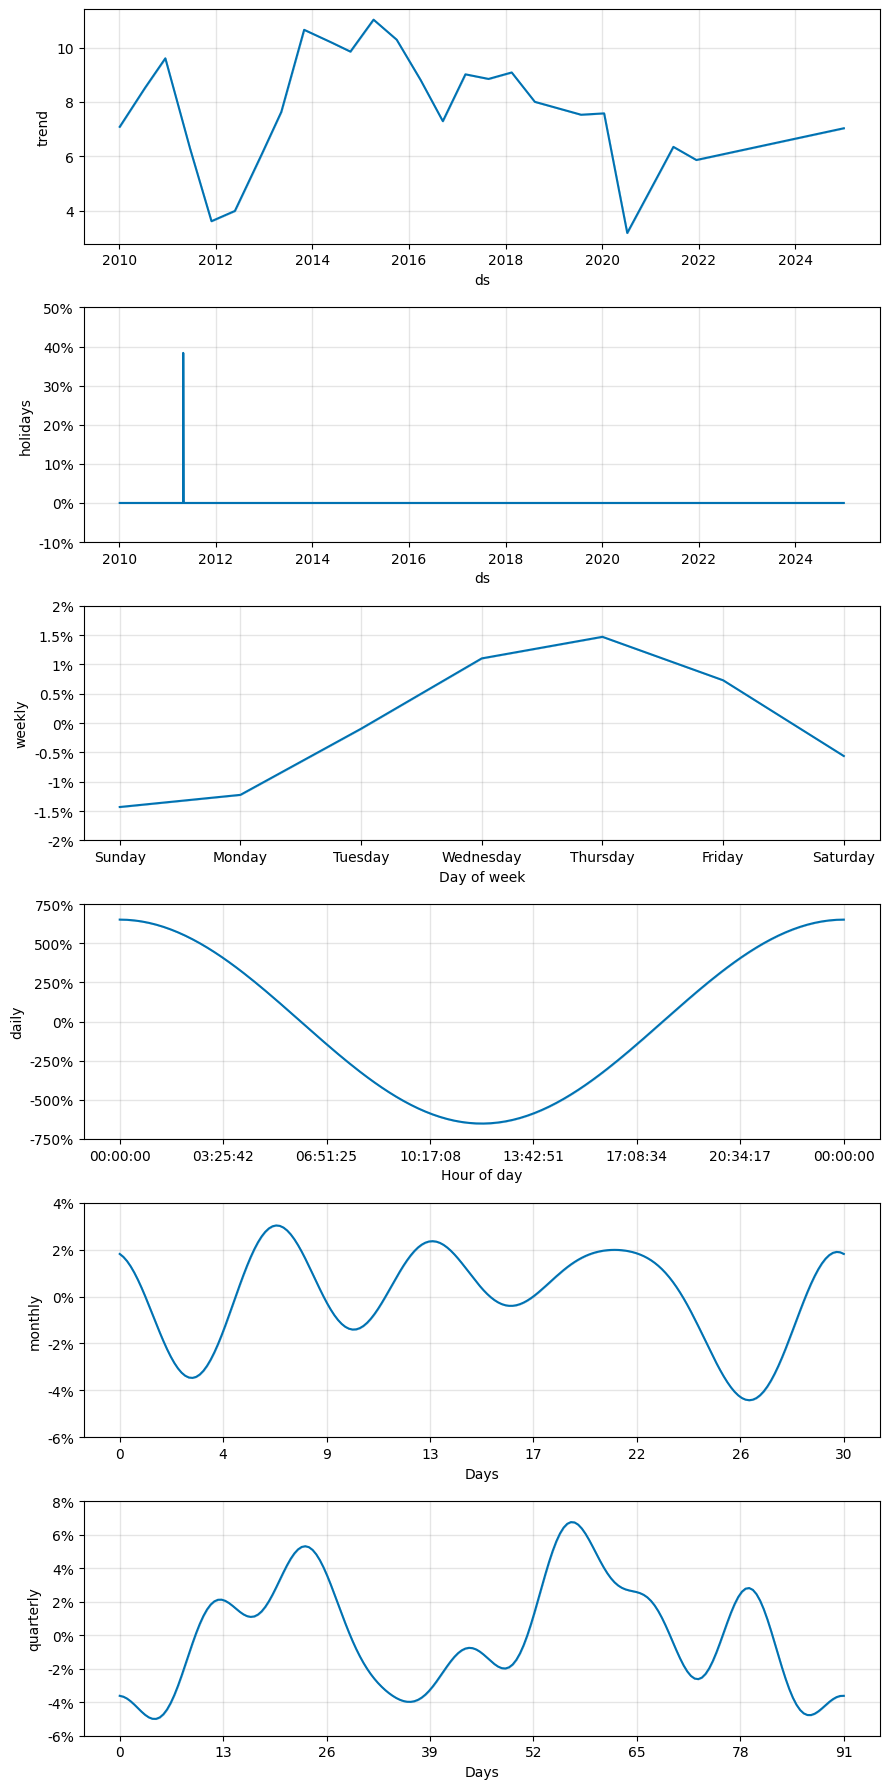

In [ ]:
# Plot historical data and forecast
prophet_model.plot(forecast)
plt.title('Prophet Forecast: Lloyds Banking Group Close Prices', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Close Price', fontsize=12, color='gray')
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.legend()
plt.show()

# Component plots
prophet_model.plot_components(forecast)
plt.tight_layout()
plt.show()

Historical Evaluation Metrics:
R-squared (R²): 0.9294
RMSE: 3.9587
MSE: 15.6713
MAE: 3.1108


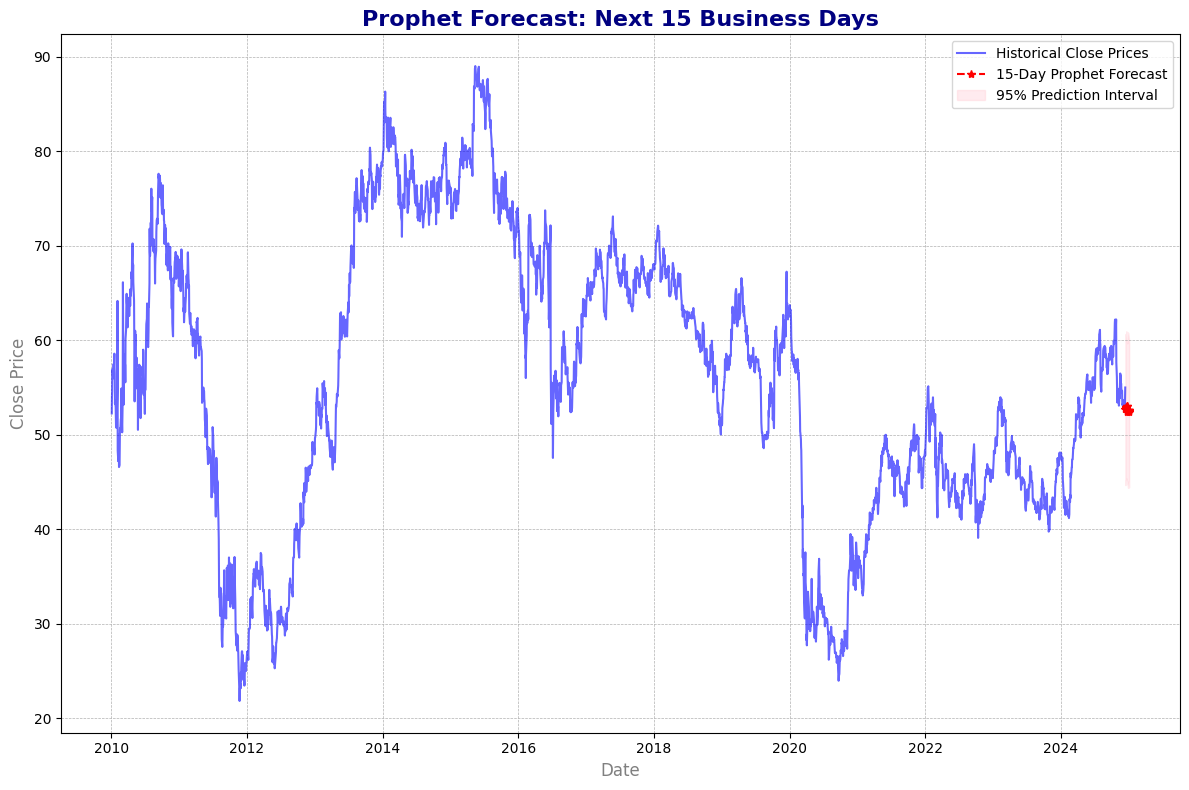

Forecasted Close Prices for the Next 15 Business Days:
             ds       yhat  yhat_lower  yhat_upper
3775 2024-12-13  52.710031   44.677465   60.638082
3776 2024-12-16  52.746177   45.235215   60.054729
3777 2024-12-17  52.794224   45.168599   60.738833
3778 2024-12-18  52.926241   45.234981   60.943364
3779 2024-12-19  53.044530   45.377737   60.376915
3780 2024-12-20  53.034441   45.284742   60.010222
3781 2024-12-23  52.469519   45.016637   59.665934
3782 2024-12-24  52.447418   44.749028   60.041958
3783 2024-12-25  52.532451   44.884147   60.798040
3784 2024-12-26  52.623962   44.584430   60.063957
3785 2024-12-27  52.649510   44.394152   60.813422
3786 2024-12-30  52.581092   45.064936   60.449027
3787 2024-12-31  52.575445   44.928906   60.264876
3788 2025-01-01  52.508043   44.420928   60.190419
3789 2025-01-02  52.370980   44.516801   59.748591


In [ ]:
# Filter historical predictions for RMSE/MSE/MAE calculation
historical_forecast = forecast[forecast['ds'] <= data_for_prophet['ds'].max()]

# Calculate RMSE, MSE, and MAE
rmse = np.sqrt(mean_squared_error(data_for_prophet['y'], historical_forecast['yhat']))
mse = mean_squared_error(data_for_prophet['y'], historical_forecast['yhat'])
mae = mean_absolute_error(data_for_prophet['y'], historical_forecast['yhat'])
r2 = r2_score(data_for_prophet['y'], historical_forecast['yhat'])

# Print the evaluation metrics
print("Historical Evaluation Metrics:")
print(f"R-squared (R²): {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")

# Plot future predictions only
plt.figure(figsize=(12, 8))
plt.plot(data_for_prophet['ds'], data_for_prophet['y'], label='Historical Close Prices', color='blue', alpha=0.6)
plt.plot(future_predictions['ds'], future_predictions['yhat'], label='15-Day Prophet Forecast', color='red', linestyle='--', marker='*')
plt.fill_between(future_predictions['ds'],
                 future_predictions['yhat_lower'],
                 future_predictions['yhat_upper'],
                 color='pink', alpha=0.3, label='95% Prediction Interval')
plt.title('Prophet Forecast: Next 15 Business Days', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Close Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Display the forecasted values for the next 15 days
print("Forecasted Close Prices for the Next 15 Business Days:")
print(future_predictions)


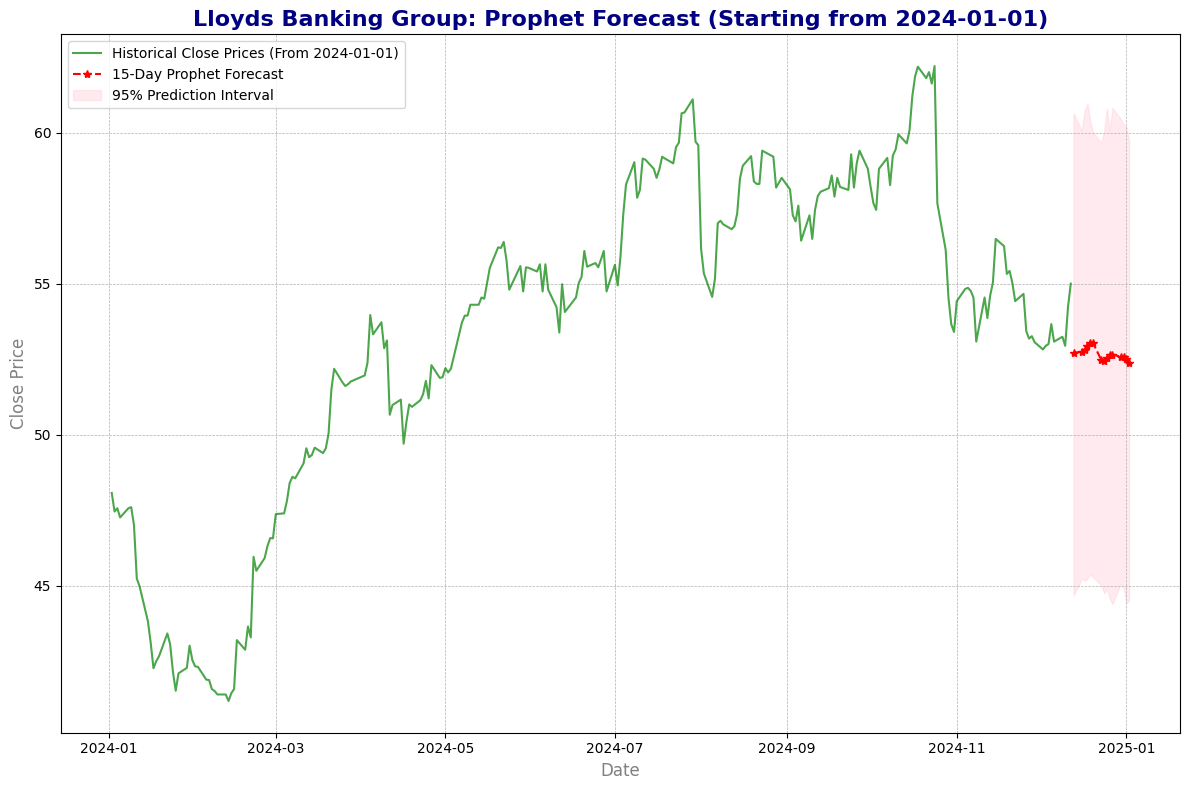

Forecasted Close Prices for the Next 15 Business Days:
             ds       yhat  yhat_lower  yhat_upper
3775 2024-12-13  52.710031   44.677465   60.638082
3776 2024-12-16  52.746177   45.235215   60.054729
3777 2024-12-17  52.794224   45.168599   60.738833
3778 2024-12-18  52.926241   45.234981   60.943364
3779 2024-12-19  53.044530   45.377737   60.376915
3780 2024-12-20  53.034441   45.284742   60.010222
3781 2024-12-23  52.469519   45.016637   59.665934
3782 2024-12-24  52.447418   44.749028   60.041958
3783 2024-12-25  52.532451   44.884147   60.798040
3784 2024-12-26  52.623962   44.584430   60.063957
3785 2024-12-27  52.649510   44.394152   60.813422
3786 2024-12-30  52.581092   45.064936   60.449027
3787 2024-12-31  52.575445   44.928906   60.264876
3788 2025-01-01  52.508043   44.420928   60.190419
3789 2025-01-02  52.370980   44.516801   59.748591


In [ ]:
# Ensure the 'ds' column is in datetime format
data_for_prophet['ds'] = pd.to_datetime(data_for_prophet['ds'])

# Filter the historical data from 2024-01-01 onward
filtered_data_prophet = data_for_prophet[data_for_prophet['ds'] >= '2024-01-01']


# Plot data from 2024-01-01 with forecast
plt.figure(figsize=(12, 8))
plt.plot(filtered_data_prophet['ds'], filtered_data_prophet['y'], label='Historical Close Prices (From 2024-01-01)', color='green', alpha=0.7)
plt.plot(future_predictions['ds'], future_predictions['yhat'], label='15-Day Prophet Forecast', color='red', linestyle='--', marker='*')
plt.fill_between(future_predictions['ds'],
                 future_predictions['yhat_lower'],
                 future_predictions['yhat_upper'],
                 color='pink', alpha=0.3, label='95% Prediction Interval')
plt.title('Lloyds Banking Group: Prophet Forecast (Starting from 2024-01-01)', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Close Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Display the forecasted values
print("Forecasted Close Prices for the Next 15 Business Days:")
print(future_predictions)


# HOLT - WINTERS Model

In [ ]:
data.head(10)

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L
0,2010-01-04,36.779499,52.259998,52.259998,51.099998,51.400002,167623403
1,2010-01-05,38.025185,54.029999,54.759998,52.200001,52.500000,233026957
2,2010-01-06,38.419304,54.590000,55.230000,53.169998,55.000000,142079248
3,2010-01-07,40.066143,56.930000,57.070000,54.000000,54.860001,216171360
4,2010-01-08,40.045040,56.900002,57.520000,56.160000,56.990002,178033888
5,2010-01-11,39.503124,56.130001,57.950001,55.630001,57.799999,169834032
6,2010-01-12,39.390518,55.970001,56.290001,55.080002,55.590000,189050155
7,2010-01-13,39.411633,56.000000,56.200001,55.160000,55.639999,117598072
8,2010-01-14,40.467293,57.500000,58.000000,56.580002,57.000000,225878876


In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


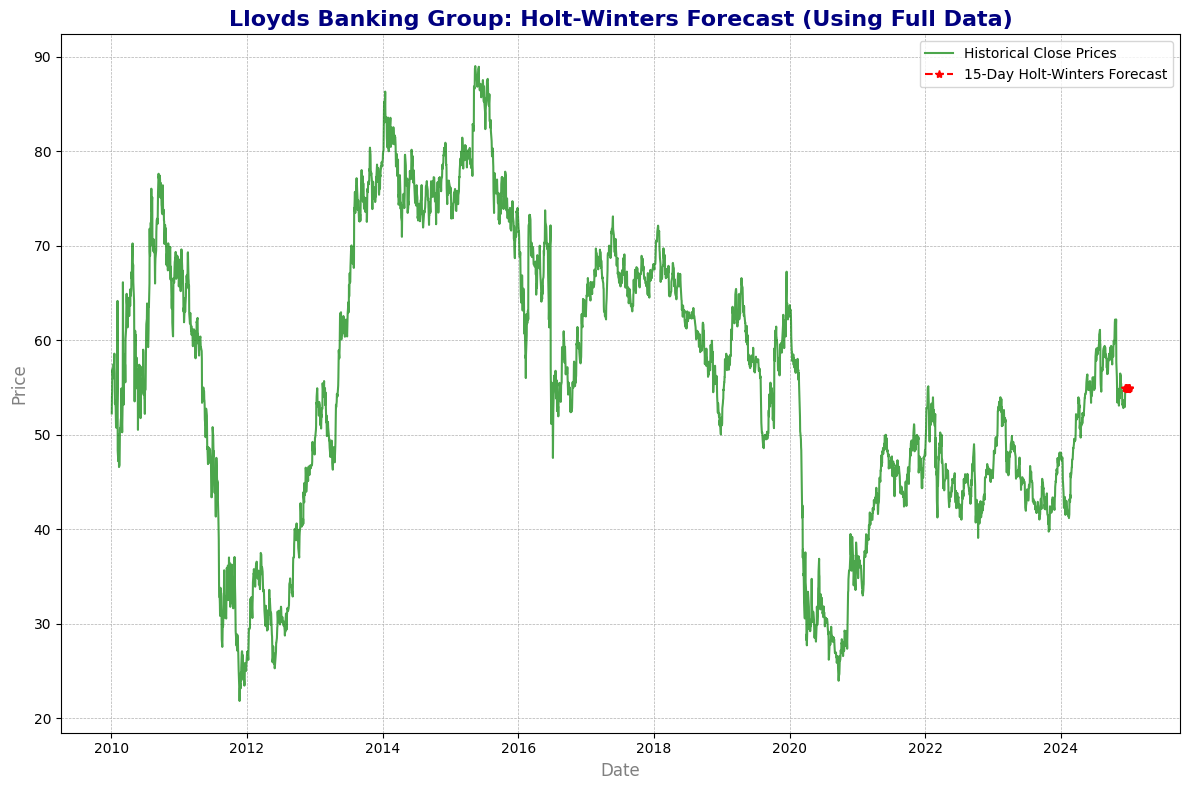

In [ ]:
# Ensure 'Date' is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Use the full dataset and rename it to data_hw
data_hw = data.copy()

# Build the Holt-Winters Model using the full dataset
holt_winters_model = ExponentialSmoothing(
    data_hw['Close'],
    trend='mul',               # Multiplicative trend
    seasonal='mul',            # Multiplicative seasonality
    seasonal_periods=12,       # Quarterly seasonality (example)
    damped_trend=True          # Damped trend
)

# Adjust seasonal_periods based on the data pattern
holt_winters_model_fit = holt_winters_model.fit(
    smoothing_level=None,      # Auto-optimize
    smoothing_slope=None,
    smoothing_seasonal=None,
    remove_bias=True,          # Remoing the bias from
)

# Forecast the next 15 business days
forecast_holt_winters = holt_winters_model_fit.forecast(steps=15)

# Create a DataFrame to hold the forecasted values
forecast_dates = pd.date_range(start=data_hw['Date'].max(), periods=16, freq='B')[1:]
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted Close': forecast_holt_winters
})

# Plot historical data and forecast
plt.figure(figsize=(12, 8))
plt.plot(data_hw['Date'], data_hw['Close'], label='Historical Close Prices', color='green', alpha=0.7)
plt.plot(forecast_df['Date'], forecast_df['Forecasted Close'], label='15-Day Holt-Winters Forecast', color='red', linestyle='--', marker='*')
plt.title('Lloyds Banking Group: Holt-Winters Forecast (Using Full Data)', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


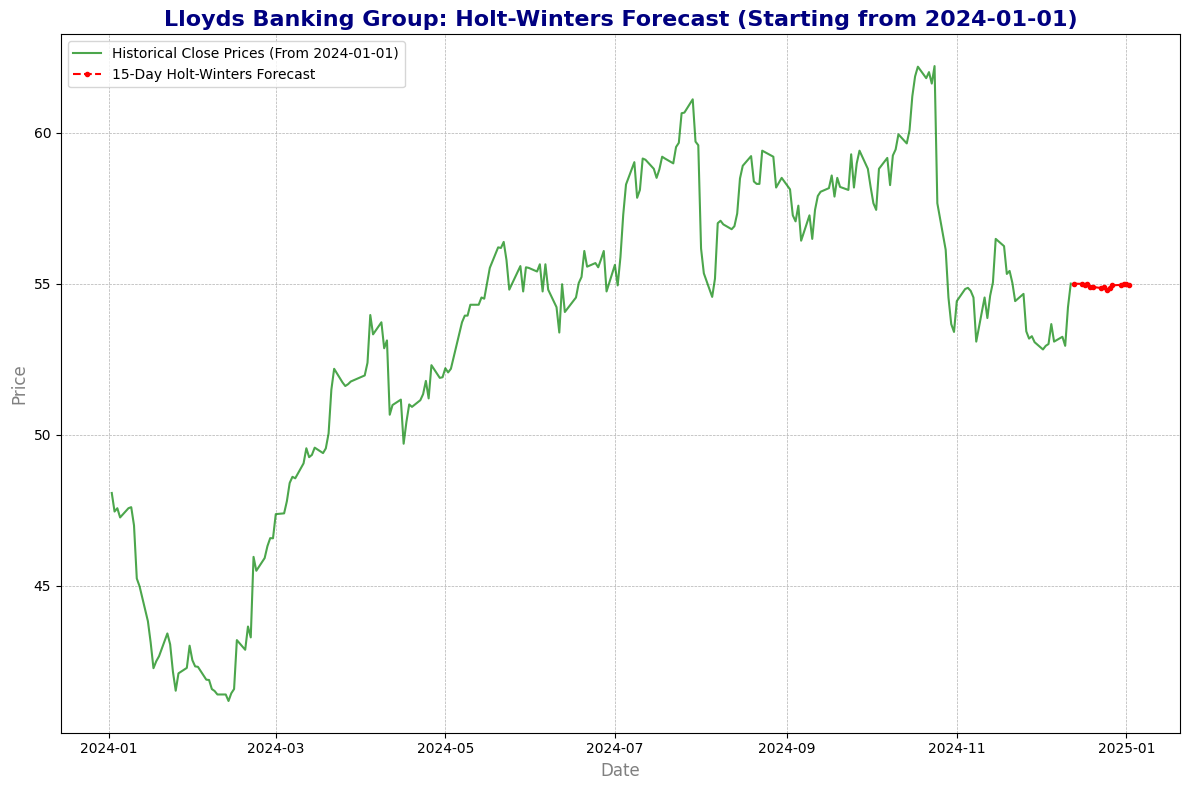

Forecasted Close Prices for the Next 15 Days of 2024:
           Date  Forecasted Close
3775 2024-12-13         54.997820
3776 2024-12-16         54.991434
3777 2024-12-17         54.954995
3778 2024-12-18         54.998970
3779 2024-12-19         54.882999
3780 2024-12-20         54.888424
3781 2024-12-23         54.852327
3782 2024-12-24         54.898472
3783 2024-12-25         54.789827
3784 2024-12-26         54.838615
3785 2024-12-27         54.942373
3786 2024-12-30         54.958043
3787 2024-12-31         54.997820
3788 2025-01-01         54.991434
3789 2025-01-02         54.954995


In [ ]:
# Ensure 'Date' is in datetime format and set it as the index
data_hw['Date'] = pd.to_datetime(data_hw['Date'])
data_hw = data_hw.set_index('Date')

# Filter historical data from 2024-01-01 onward using the 'Date' index
filtered_df = data_hw[data_hw.index >= '2024-01-01']

# Plot data from 2024-01-01 with forecast
plt.figure(figsize=(12, 8))
plt.plot(filtered_df.index, filtered_df['Close'], label='Historical Close Prices (From 2024-01-01)', color='green', alpha=0.7)
plt.plot(forecast_df['Date'], forecast_df['Forecasted Close'], label='15-Day Holt-Winters Forecast', color='red', linestyle='--', marker='.')
plt.title('Lloyds Banking Group: Holt-Winters Forecast (Starting from 2024-01-01)', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Display the forecasted values
print("Forecasted Close Prices for the Next 15 Days of 2024:")
print(forecast_df)


In [ ]:
original_values = data_hw['Close']
predicted_hw_values = forecast_df['Forecasted Close']

In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(original_values[-15:], predicted_hw_values)
rmse = math.sqrt(mse)
mae = mean_absolute_error(original_values[-15:], predicted_hw_values)
r2 = r2_score(original_values[-15:], predicted_hw_values)

# Print the evaluation metrics
print("Test Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Test Evaluation Metrics:
Mean Squared Error (MSE): 2.3931
Root Mean Squared Error (RMSE): 1.5470
Mean Absolute Error (MAE): 1.4086
R-squared (R²): -4.1881


In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(oridinal_values[-15:], predicted_hw_values) # Changed 'original_values' to 'oridinal_values' to match the defined variable name.
rmse = math.sqrt(mse)
mae = mean_absolute_error(oridinal_values[-15:], predicted_hw_values) # Changed 'original_values' to 'oridinal_values' to match the defined variable name.
r2 = r2_score(oridinal_values[-15:], predicted_hw_values) # Changed 'original_values' to 'oridinal_values' to match the defined variable name.

# Print the evaluation metrics
print("Test Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")